In [9]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sys.path.append('..')
from helper import *

setwd()

In [11]:
con = duckdb.connect(database="data/exploitation.db", read_only=True)
df = con.execute("SELECT * FROM sandbox_preprocessed").fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7f66b05017f0>>

In [12]:
df.head()

region     price       type    sqfeet  beds  baths cats_allowed  \
0  jacksonville  6.659294  apartment  6.444131   1.0    1.0          Yes   
1  jacksonville  7.446001  apartment  7.227662   3.0    2.0          Yes   
2  jacksonville  7.086738  apartment  6.775366   1.0    1.0          Yes   
3  jacksonville  6.594413  apartment  6.685861   3.0    1.0          Yes   
4  jacksonville  7.330405     duplex  7.050123   3.0    2.0          Yes   

  dogs_allowed smoking_allowed wheelchair_access  ... preschool  \
0          Yes              No                No  ...  9.307195   
1          Yes             Yes               Yes  ...  9.403272   
2          Yes             Yes                No  ...  9.403272   
3          Yes              No                No  ...  8.168770   
4          Yes             Yes                No  ...  7.070724   

  elementary_school middle_school high_school  N_baths  half_baths  \
0          7.957527      7.933438    7.830823      1.0          No   
1          8.055158      8.096817    7.918629      2.0          No   
2          8.055158      8.096817    7.918629      1.0          No   
3          6.806829      6.806829    6.511745      1.0          No   
4          5.746203      5.638355    5.549076      2.0          No   

  b_hospital_type_critical  b_hospital_type_longterm  \
0                       No                        No   
1                       No                       Yes   
2                       No                       Yes   
3                       No                        No   
4                       No                        No   

   b_hospital_type_children        b_type  
0                       Yes     Apartment  
1                       Yes     Apartment  
2                       Yes     Apartment  
3                       Yes     Apartment  
4                       Yes  No-Apartment  

[5 rows x 39 columns]

In [13]:
numeric_description(df)

mean           std         min  \
price                          6.982588      0.402094    5.669881   
sqfeet                         6.839168      0.333215    5.620401   
beds                           1.887550      0.864784    0.000000   
baths                          1.473782      0.575278    0.000000   
lat                           37.243055      5.549730  -43.533300   
long                         -92.599925     16.474182 -163.894000   
num_hospitals               1614.366730   2771.381270    0.000000   
num_beds                      11.047999      2.056899    5.010635   
hospital_type_general          5.534394      1.935844    0.256193   
hospital_type_critical         1.181960      2.016236   -2.668672   
hospital_type_psychiatric      3.471390      2.304868    0.000000   
hospital_type_longterm         2.832878      2.352226    0.000000   
hospital_type_children         1.338989      1.940776    0.000000   
government_hospital            3.839966      2.210187    0.000000   
nonprofit_hospital             5.080149      2.070806    0.000000   
private_hospital               4.435795      2.460473    0.000000   
num_schools                23525.073465  44770.629883    0.000000   
num_students                  15.016645      2.012981    9.255963   
preschool                      8.076691      1.959594    2.745536   
elementary_school              6.878011      1.963184    1.602064   
middle_school                  6.990100      1.934676    1.885647   
high_school                    5.722774      2.197279    0.000000   
N_baths                        1.419466      0.559522    0.000000   

                                   25%          50%           75%  \
price                         6.704414     6.947937      7.241366   
sqfeet                        6.621406     6.855409      7.044905   
beds                          1.000000     2.000000      2.000000   
baths                         1.000000     1.000000      2.000000   
lat                          33.454700    37.665800     41.152300   
long                        -99.464850   -87.677700    -81.165400   
num_hospitals               105.000000   616.000000   1836.000000   
num_beds                      9.679781    11.437782     12.590498   
hospital_type_general         4.158883     5.899897      6.985642   
hospital_type_critical        0.000000     0.000000      1.945910   
hospital_type_psychiatric     1.386294     3.912023      5.313206   
hospital_type_longterm        0.000000     3.044522      4.859812   
hospital_type_children        0.000000     0.000000      2.890372   
government_hospital           1.945910     4.290459      5.594711   
nonprofit_hospital            3.688879     5.420535      6.613384   
private_hospital              2.639057     4.948760      6.336826   
num_schools                1578.000000  8640.000000  25805.000000   
num_students                 13.676871    15.402355     16.508731   
preschool                     6.779922     8.449984      9.537015   
elementary_school             5.533389     7.247081      8.343078   
middle_school                 5.686975     7.353082      8.425297   
high_school                   4.276666     6.089045      7.347300   
N_baths                       1.000000     1.000000      2.000000   

                                     max  missings  missing ratio (%)  
price                           8.296796       0.0                0.0  
sqfeet                          8.269423       0.0                0.0  
beds                            5.000000       0.0                0.0  
baths                           4.000000       0.0                0.0  
lat                           102.036000       0.0                0.0  
long                          172.633000       0.0                0.0  
num_hospitals               26332.000000       0.0                0.0  
num_beds                       15.060759       0.0                0.0  
hospital_type_general           9.554229       0.0                0.0  
h

In [14]:
description_categorical(df)

#Levels             Max Freq (Abs,%)  \
0                     region      404    jacksonville (4206, 1.11)   
1                       type       12    apartment (312657, 82.88)   
2               cats_allowed        2          Yes (275263, 72.96)   
3               dogs_allowed        2           Yes (267849, 71.0)   
4            smoking_allowed        2          Yes (276442, 73.28)   
5          wheelchair_access        2           No (346491, 91.85)   
6    electric_vehicle_charge        2           No (372492, 98.74)   
7            comes_furnished        2           No (360375, 95.53)   
8            laundry_options        6  w/d in unit (128539, 34.07)   
9            parking_options        8       unknow (137985, 36.58)   
10                     state       51             ca (31581, 8.37)   
11                half_baths        2           No (336268, 89.14)   
12  b_hospital_type_critical        2           No (256851, 68.08)   
13  b_hospital_type_longterm        2          Yes (266930, 70.76)   
14  b_hospital_type_children        2           No (229865, 60.93)   
15                    b_type        2    Apartment (312657, 82.88)   

                   Min Freq (Abs,%)  #Unknows  Unknows (%)  
0              kansas city (3, 0.0)         0         0.00  
1          assisted living (1, 0.0)         0         0.00  
2                No (101993, 27.04)         0         0.00  
3                 No (109407, 29.0)         0         0.00  
4                No (100814, 26.72)         0         0.00  
5                 Yes (30765, 8.15)         0         0.00  
6                  Yes (4764, 1.26)         0         0.00  
7                 Yes (16881, 4.47)         0         0.00  
8   no laundry on site (3518, 0.93)     77803        20.62  
9         valet parking (131, 0.03)    137985        36.58  
10                   wy (185, 0.05)         0         0.00  
11               Yes (40988, 10.86)         0         0.00  
12              Yes (120405, 31.92)         0         0.00  
13               No (110326, 29.24)         0         0.00  
14              Yes (147391, 39.07)         0         0.00  
15      No-Apartment (64599, 17.12)         0         0.00

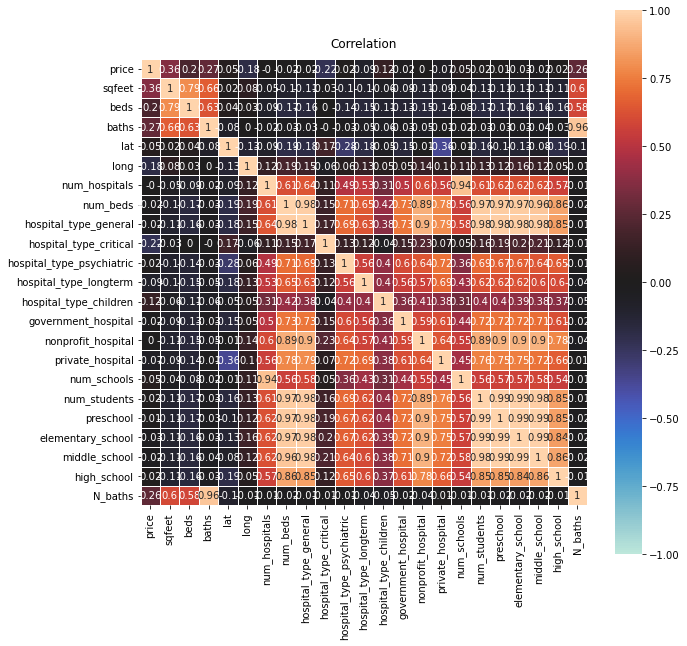

In [15]:
correlation(df)

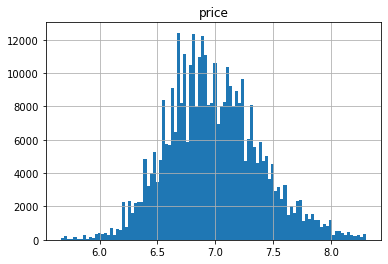

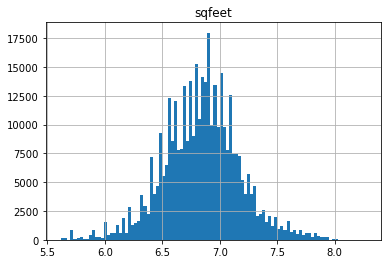

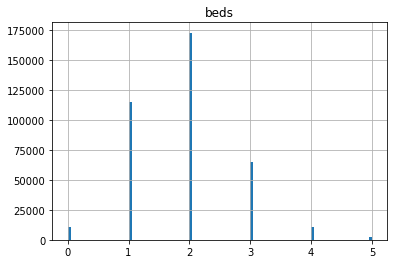

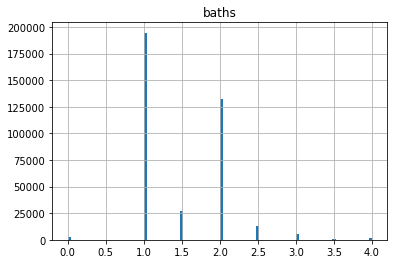

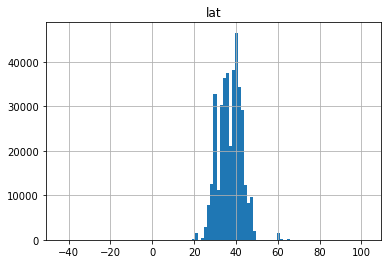

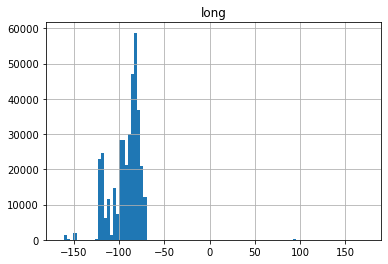

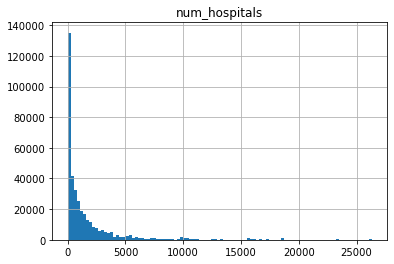

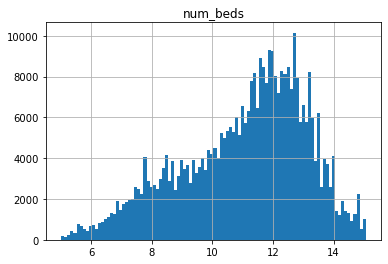

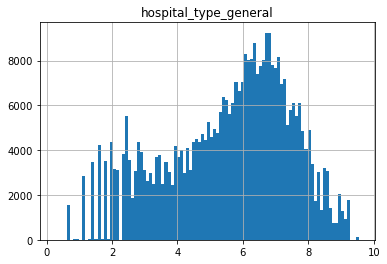

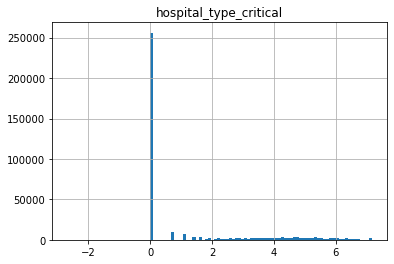

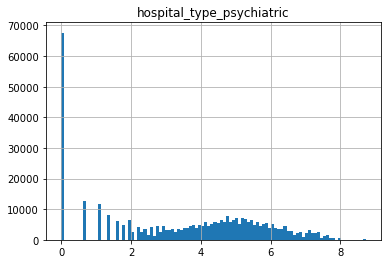

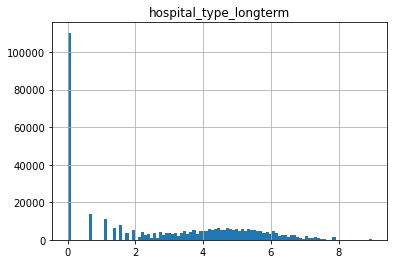

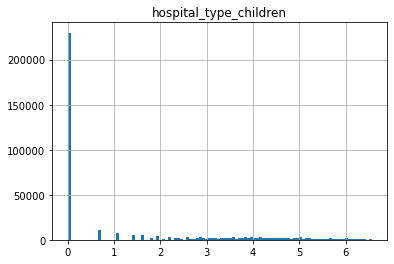

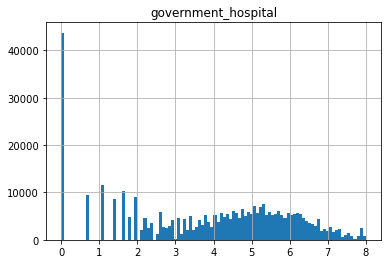

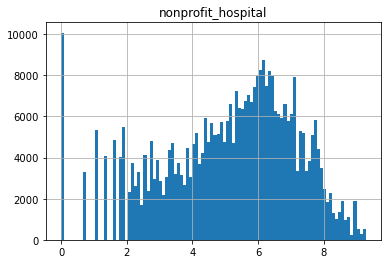

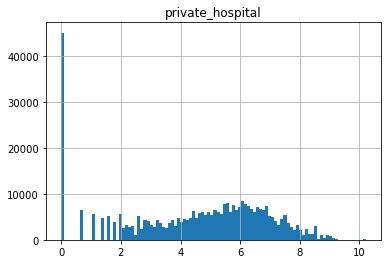

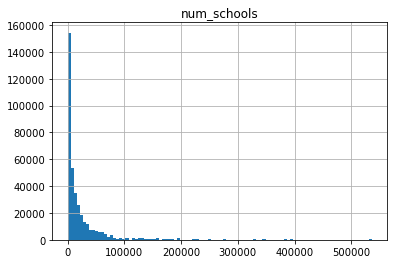

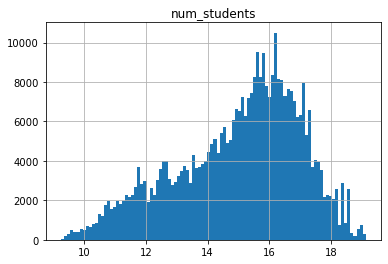

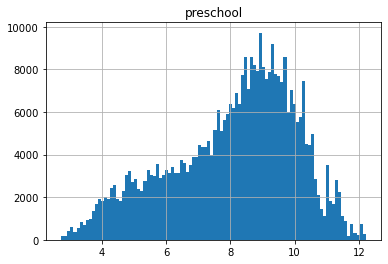

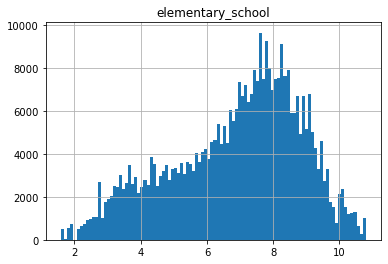

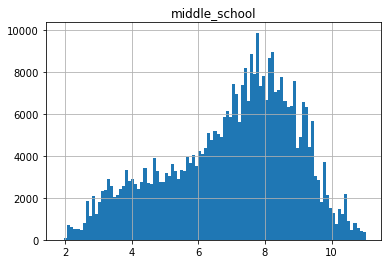

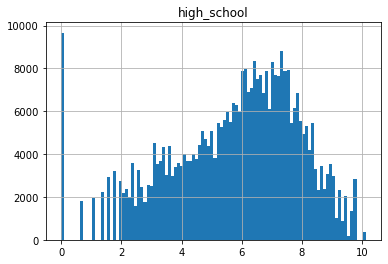

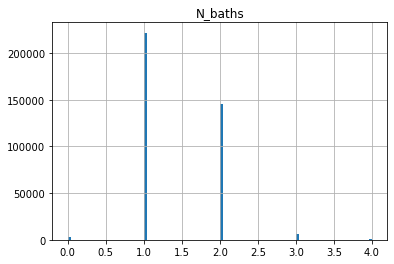

In [16]:
hist(df, bins=100)

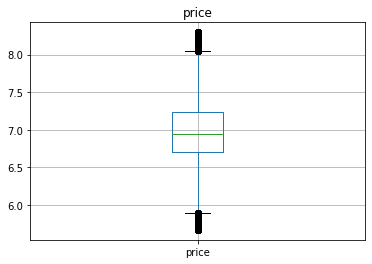

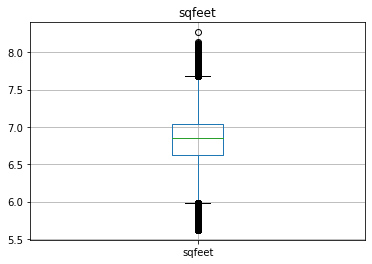

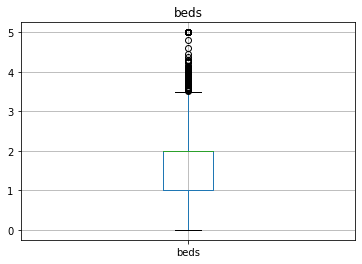

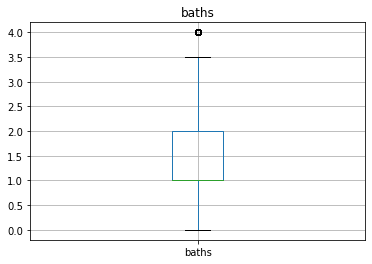

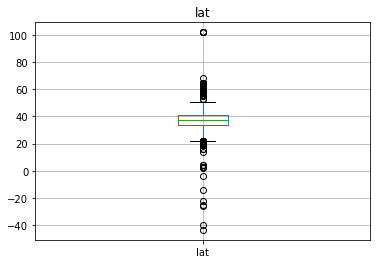

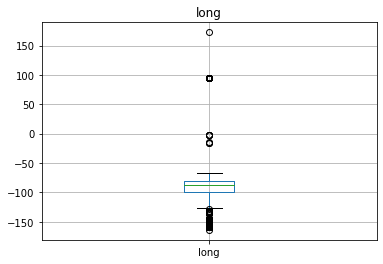

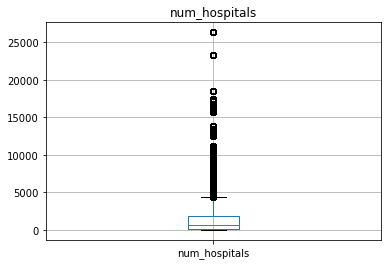

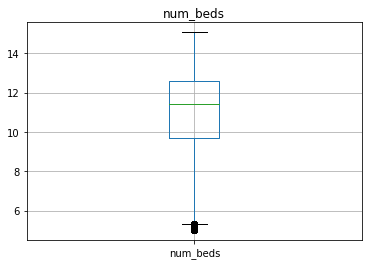

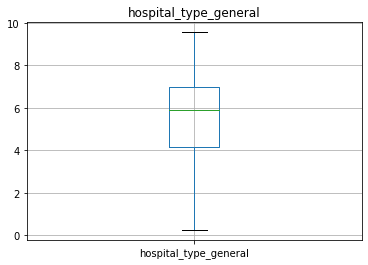

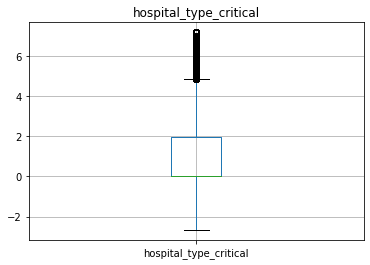

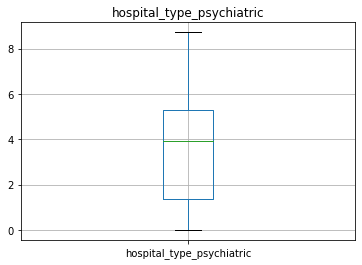

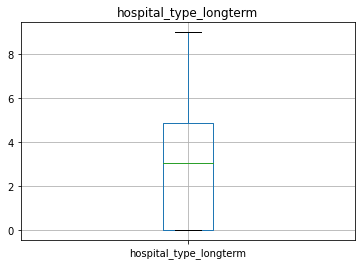

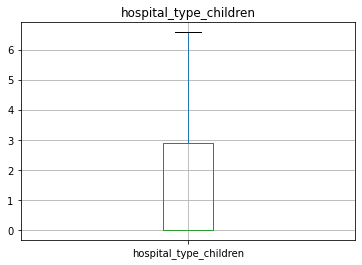

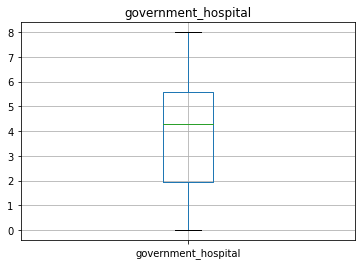

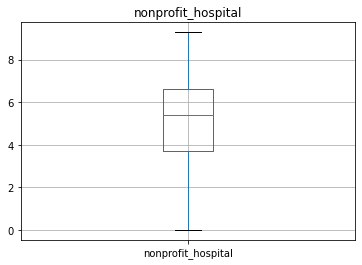

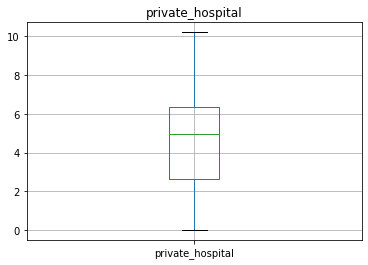

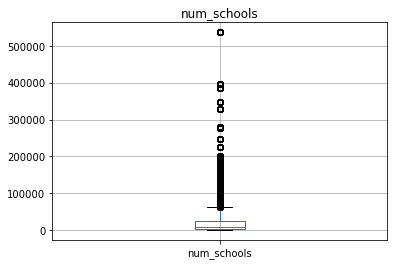

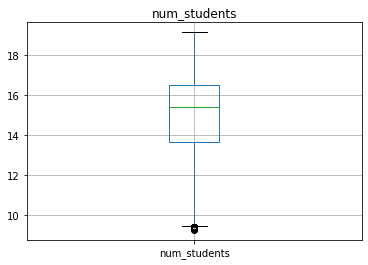

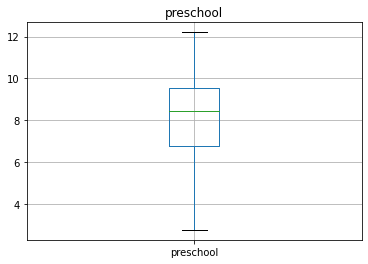

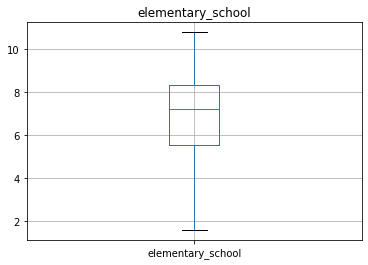

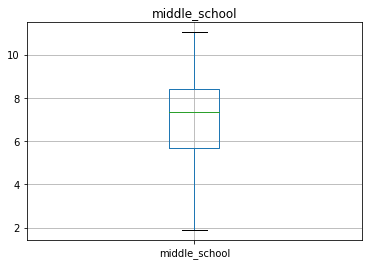

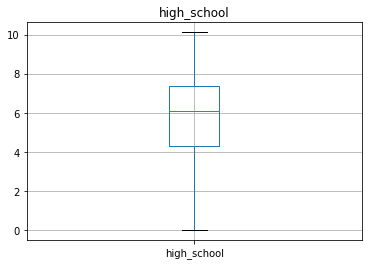

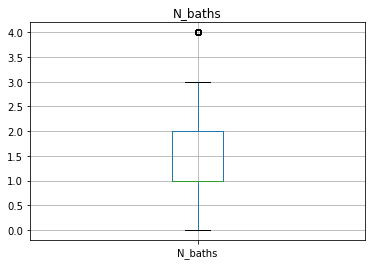

In [17]:
boxplot(df)

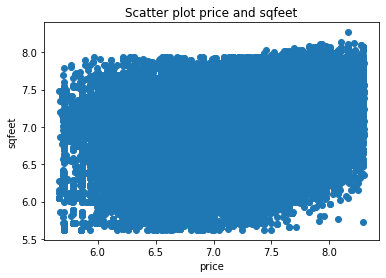

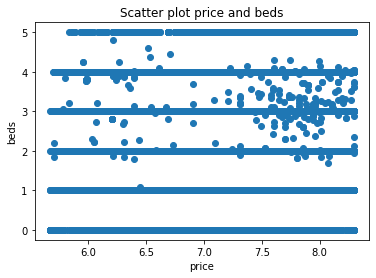

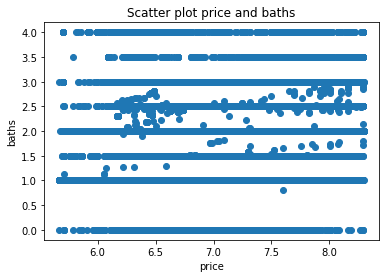

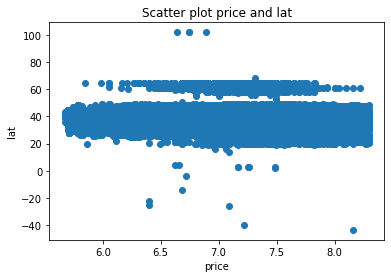

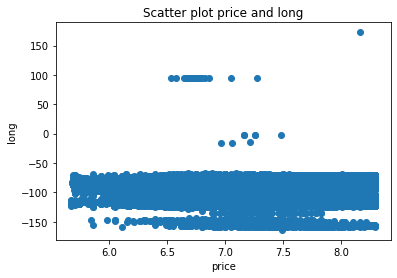

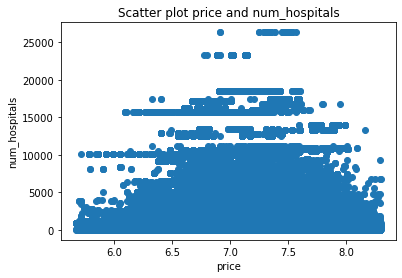

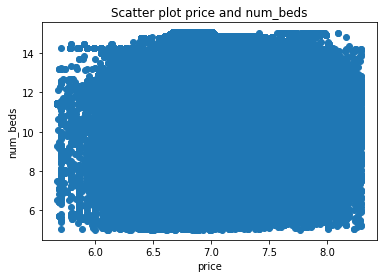

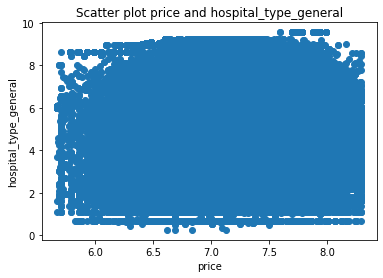

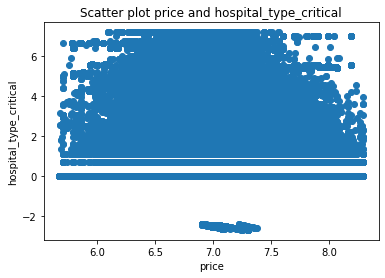

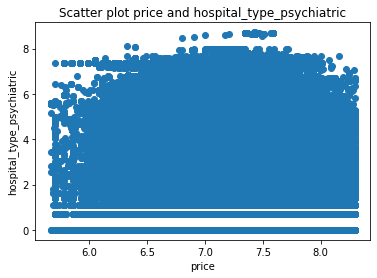

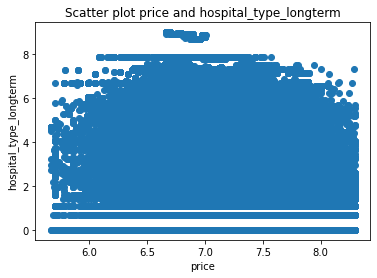

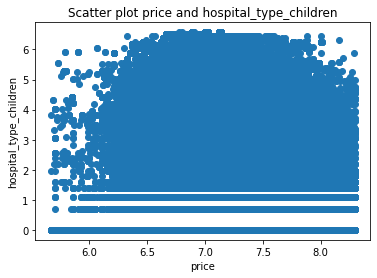

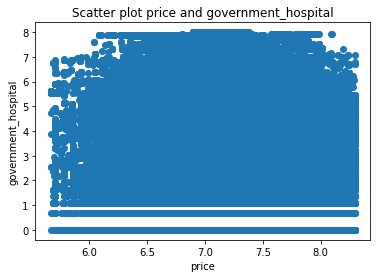

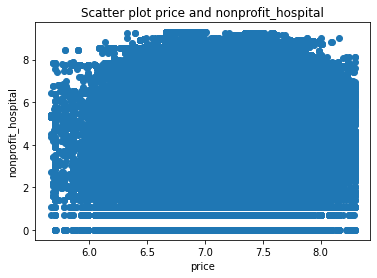

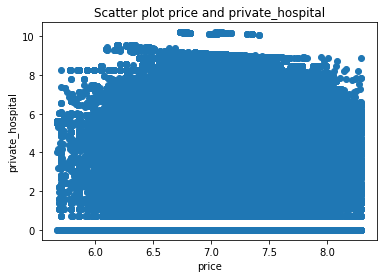

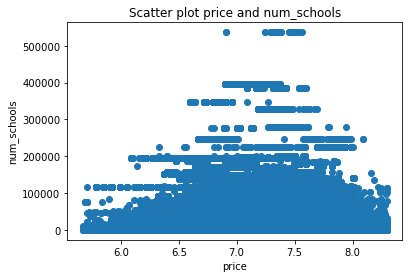

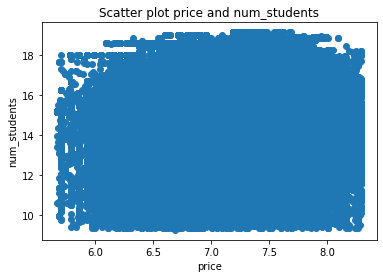

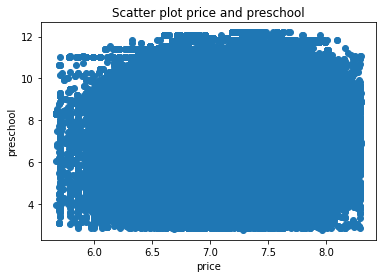

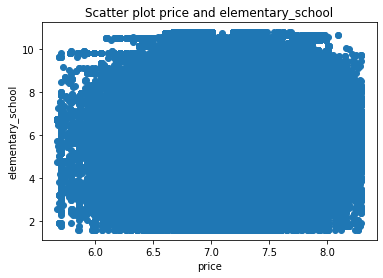

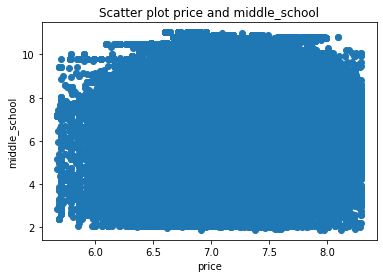

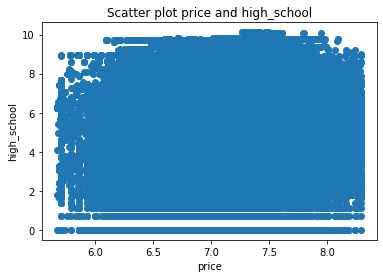

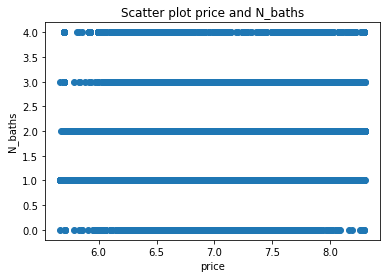

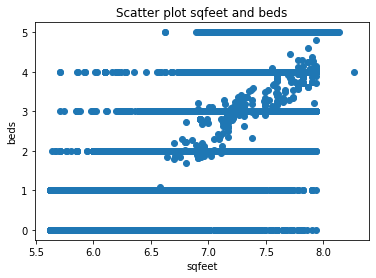

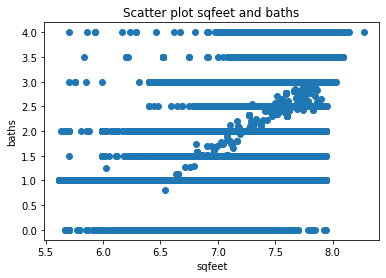

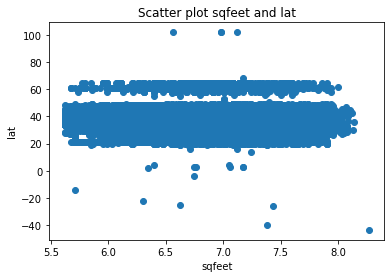

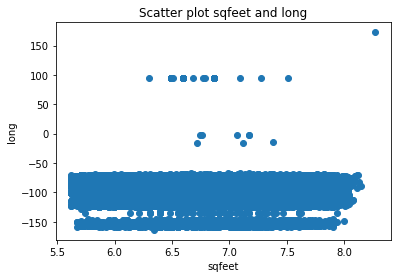

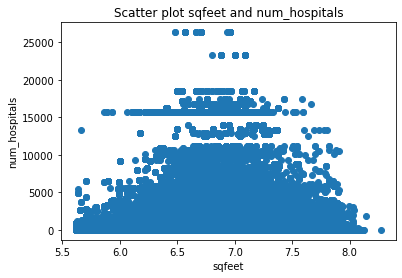

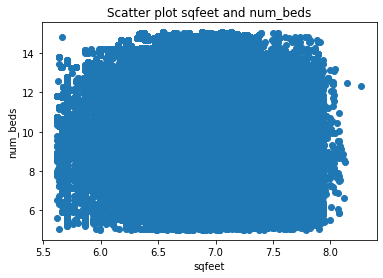

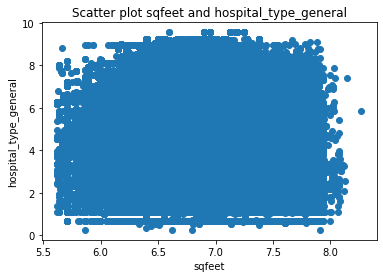

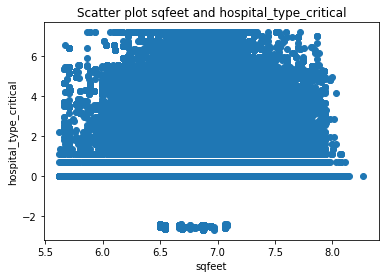

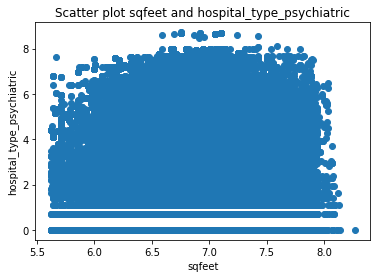

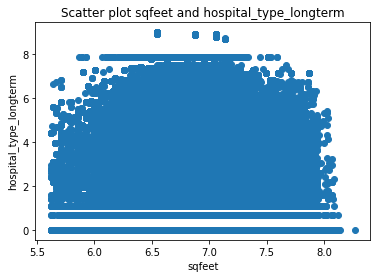

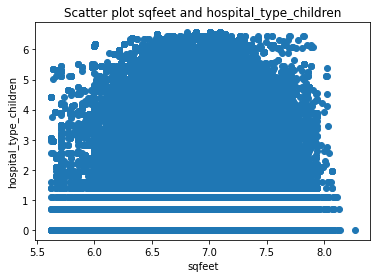

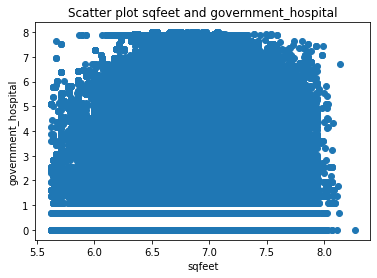

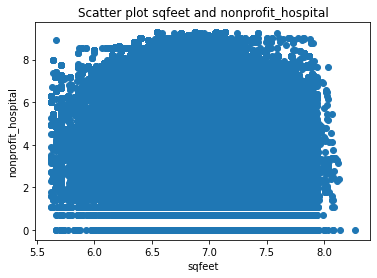

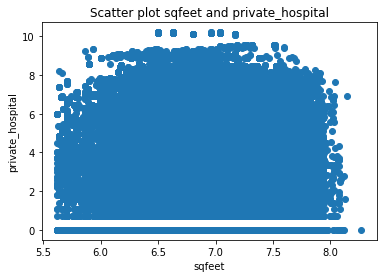

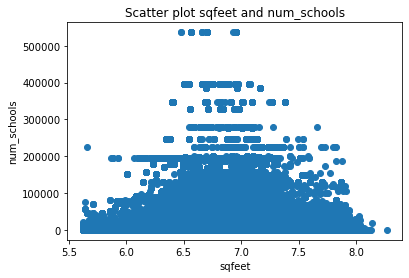

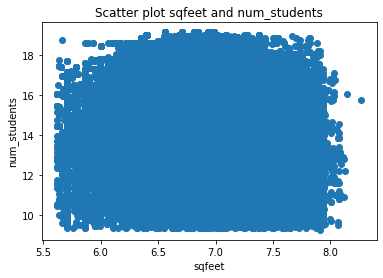

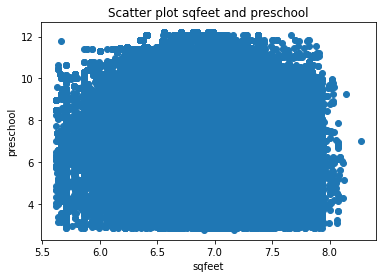

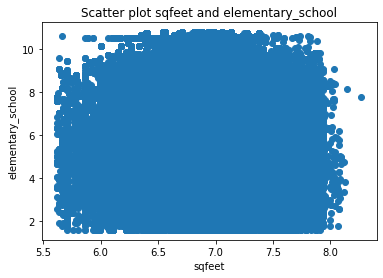

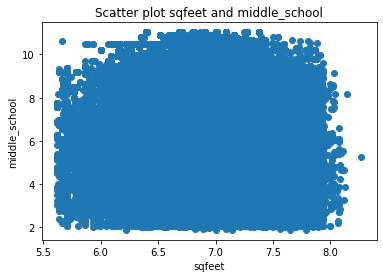

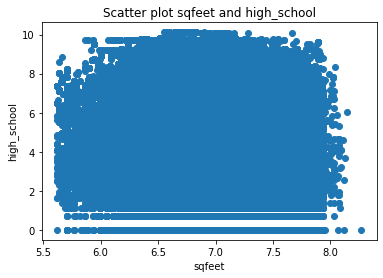

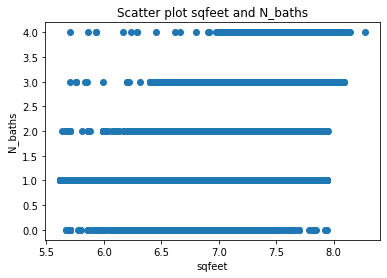

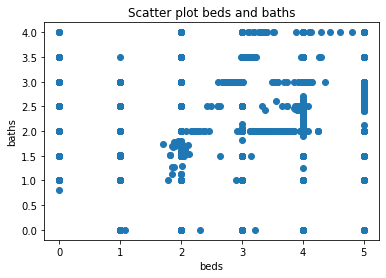

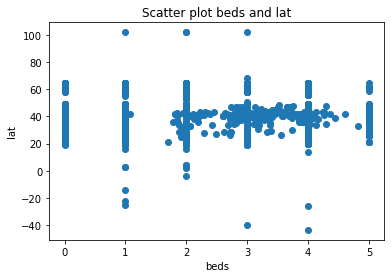

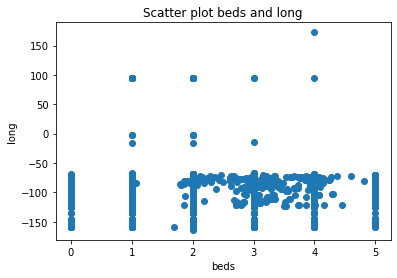

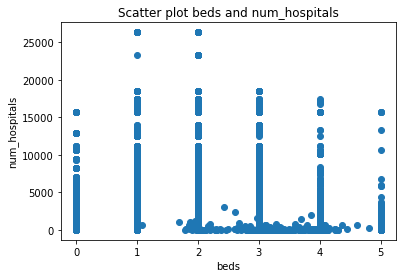

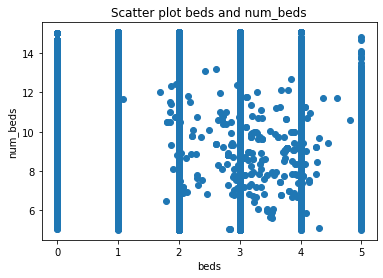

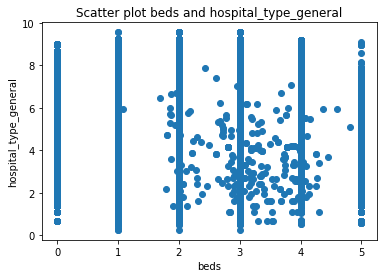

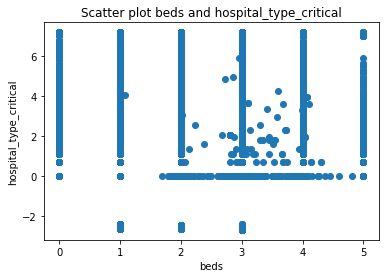

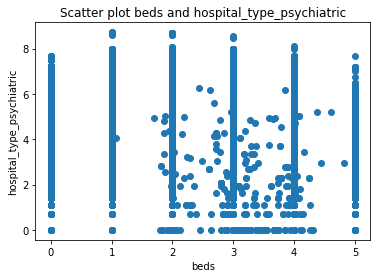

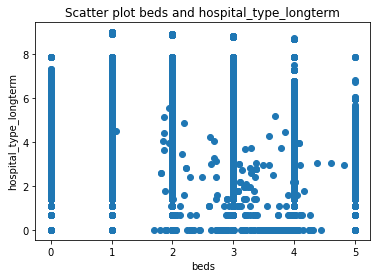

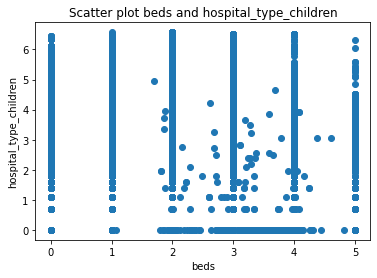

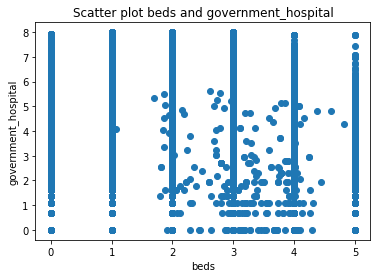

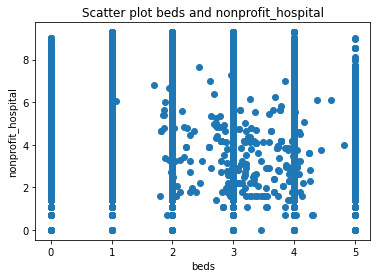

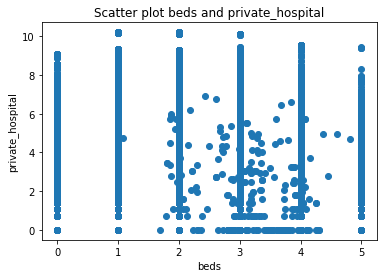

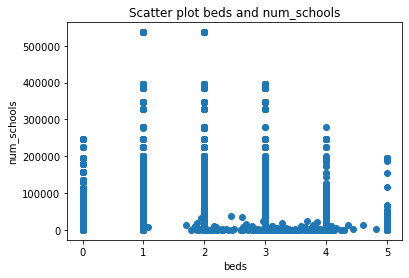

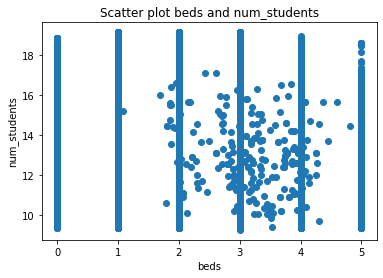

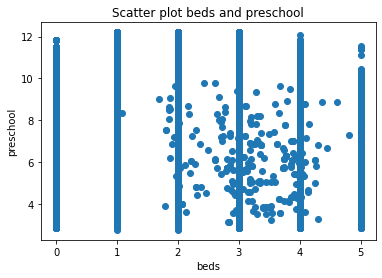

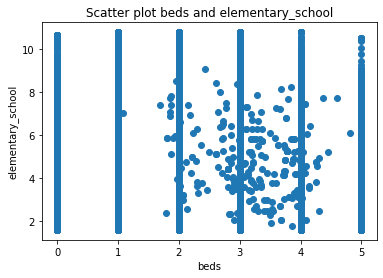

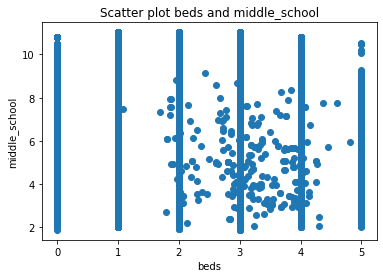

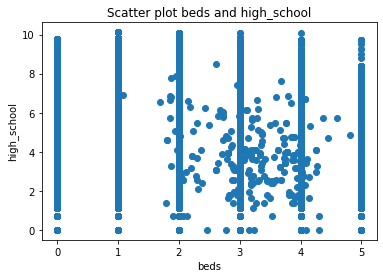

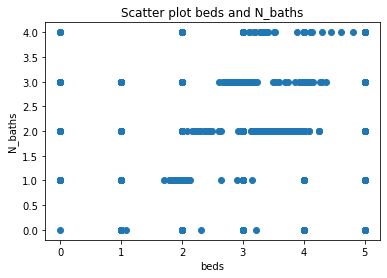

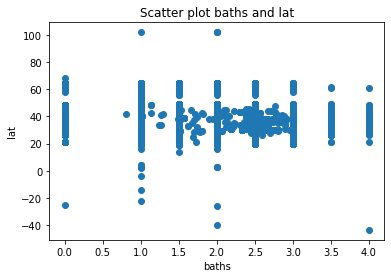

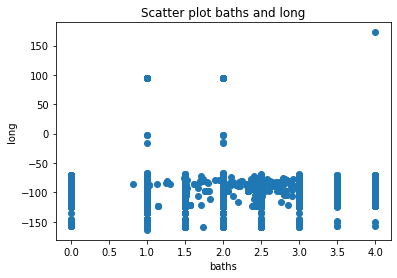

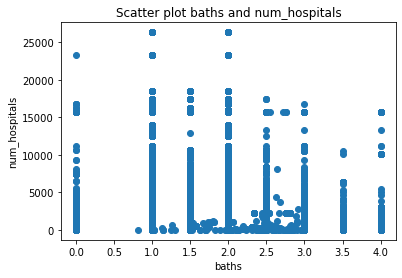

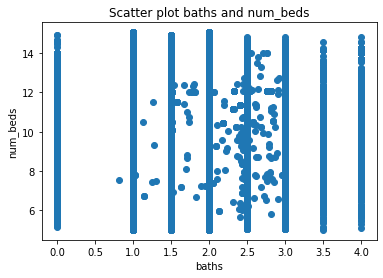

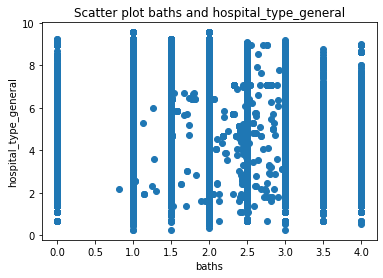

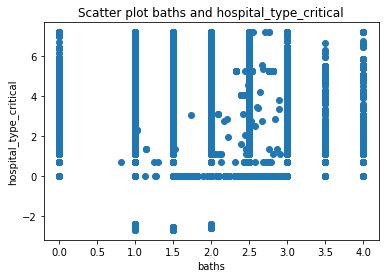

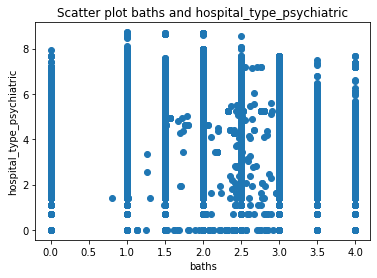

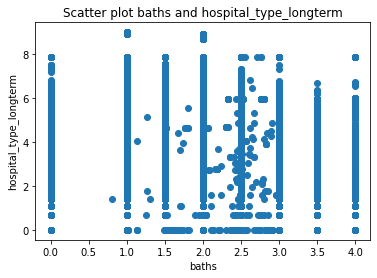

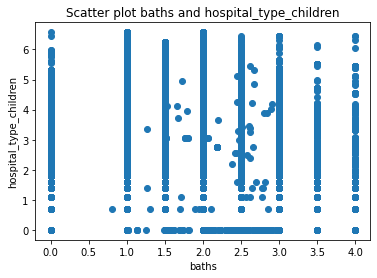

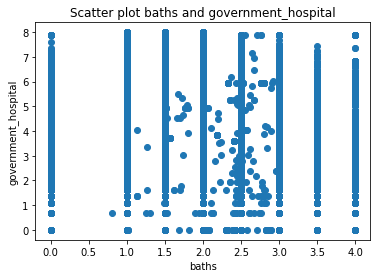

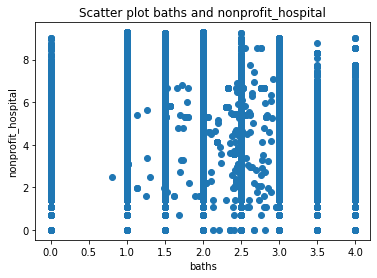

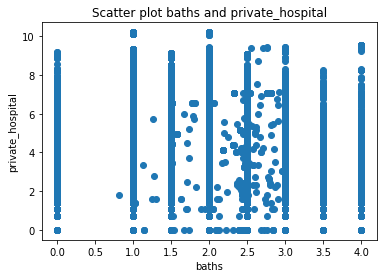

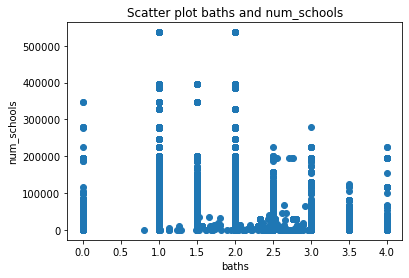

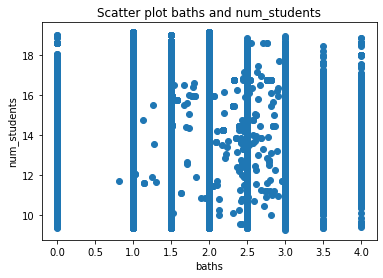

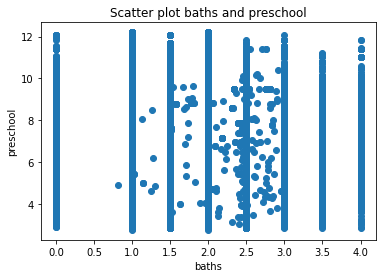

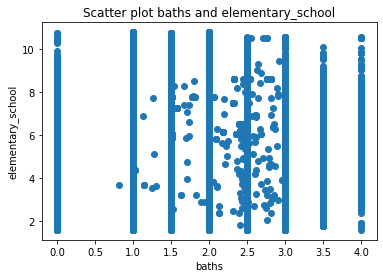

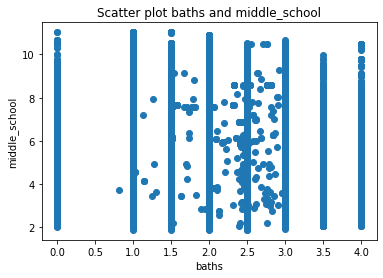

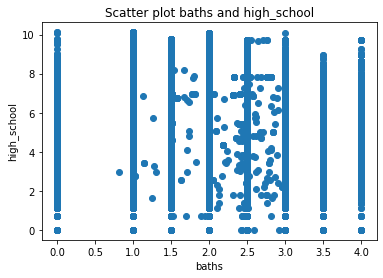

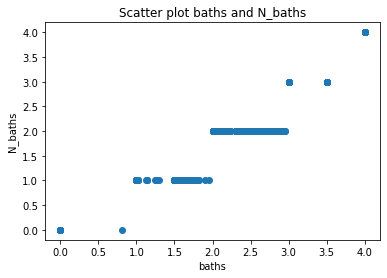

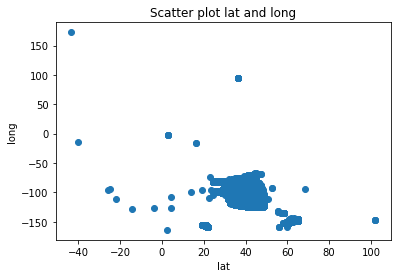

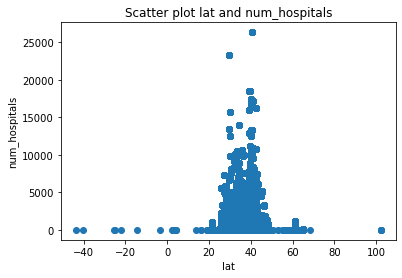

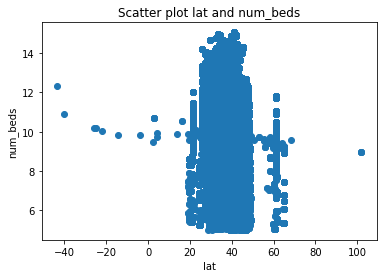

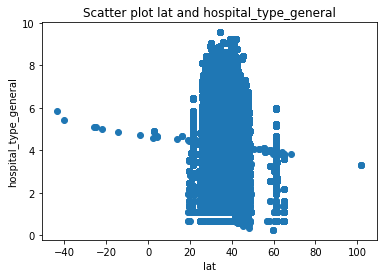

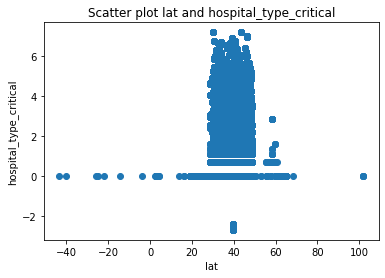

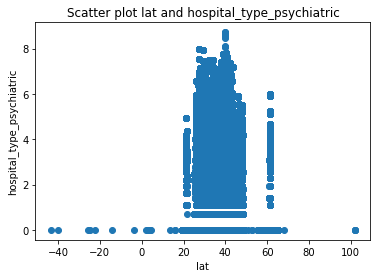

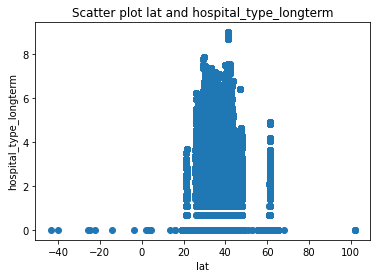

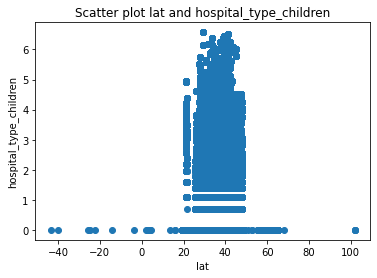

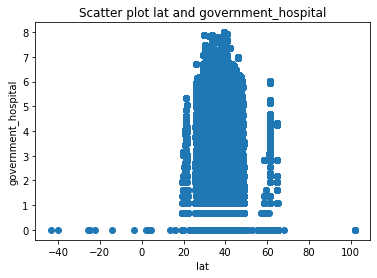

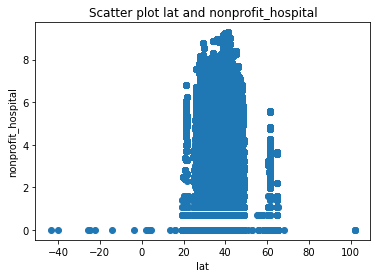

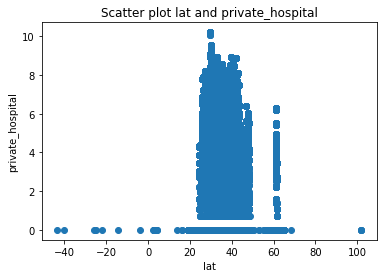

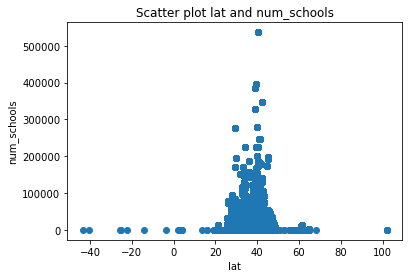

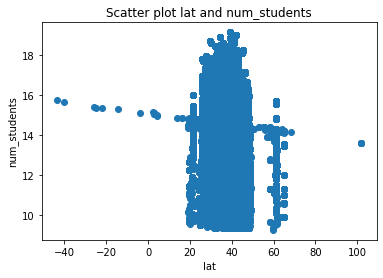

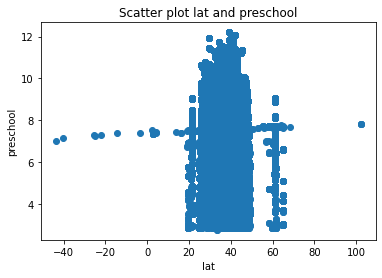

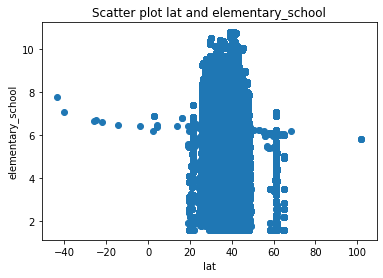

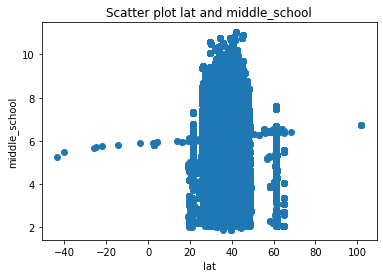

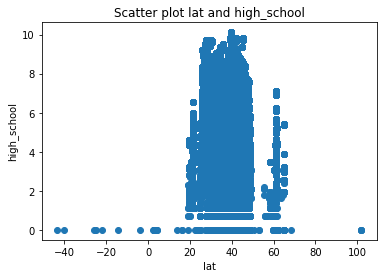

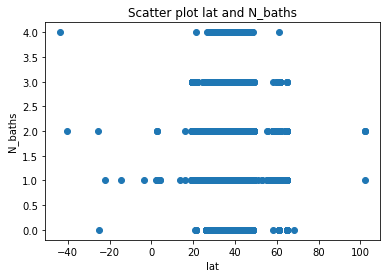

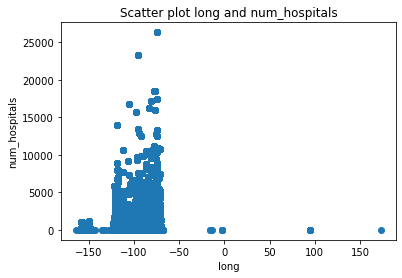

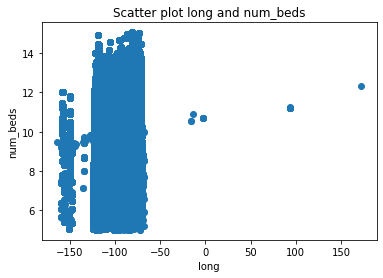

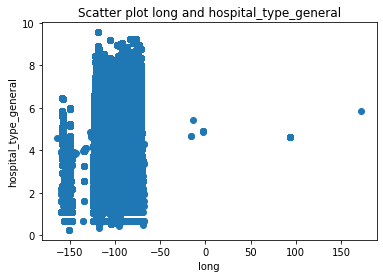

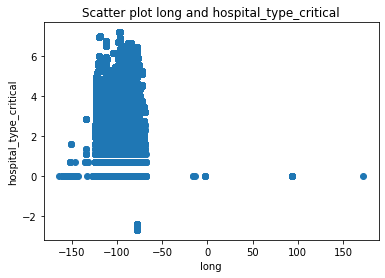

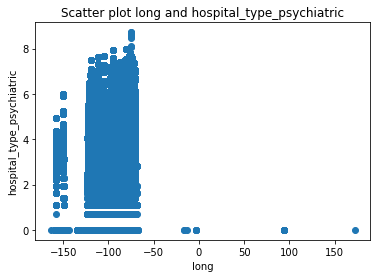

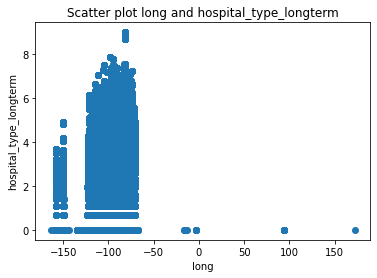

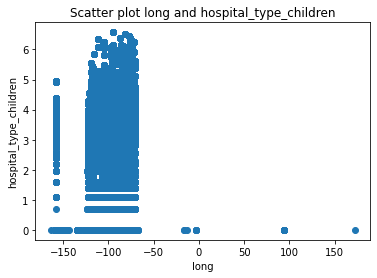

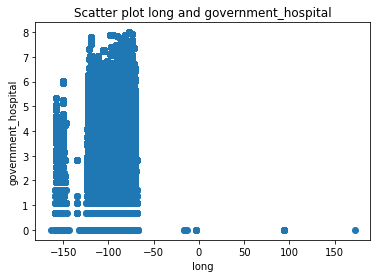

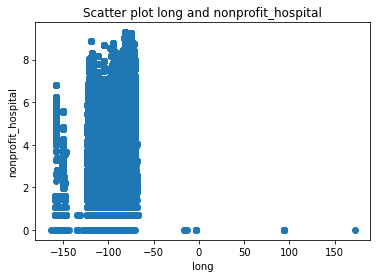

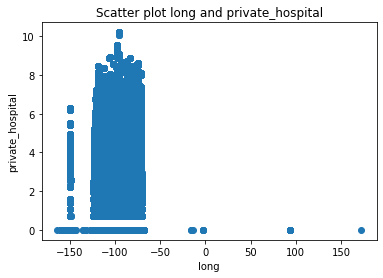

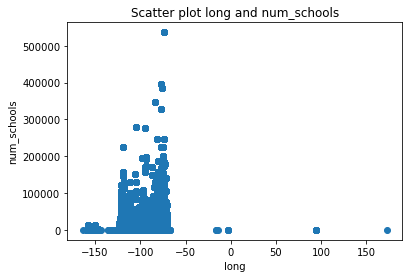

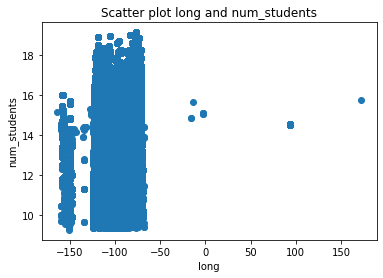

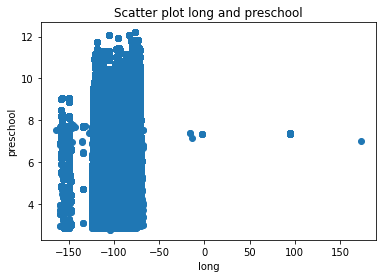

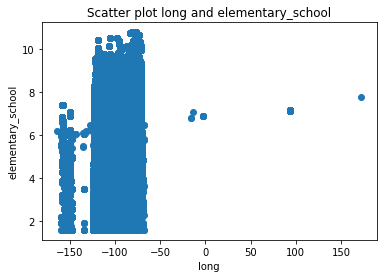

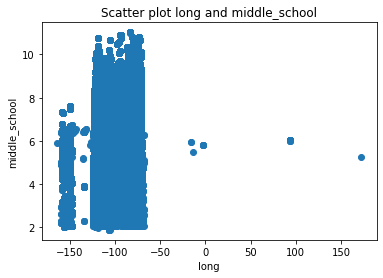

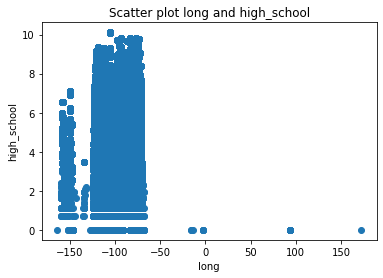

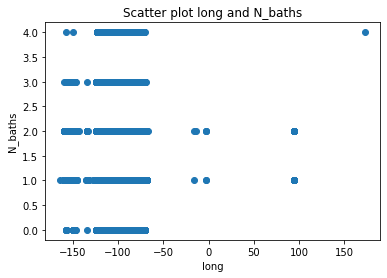

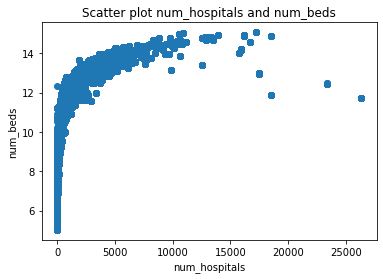

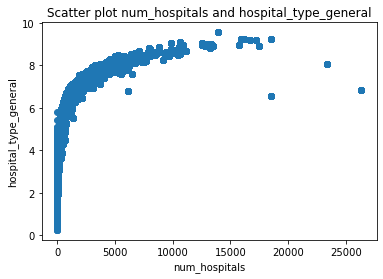

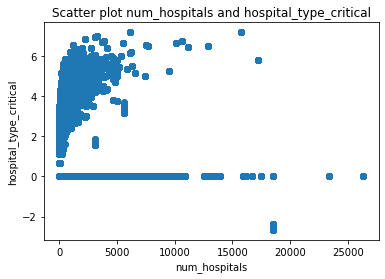

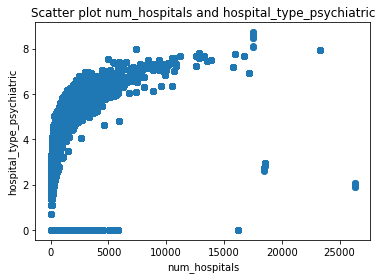

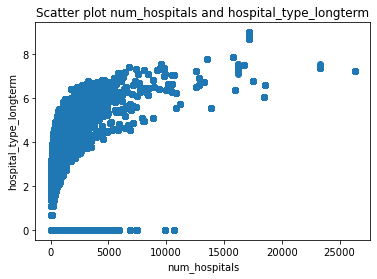

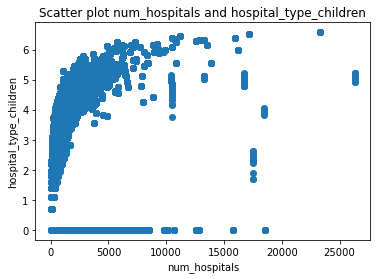

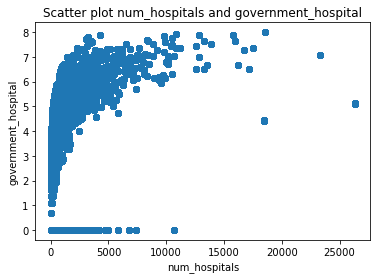

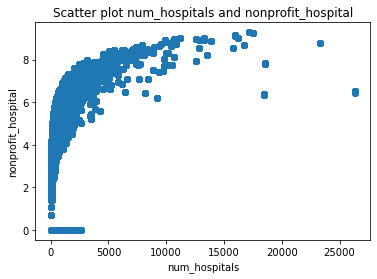

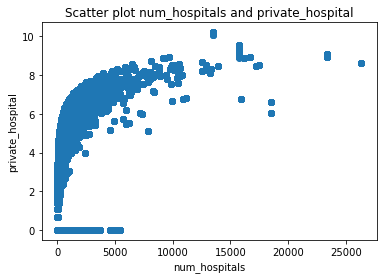

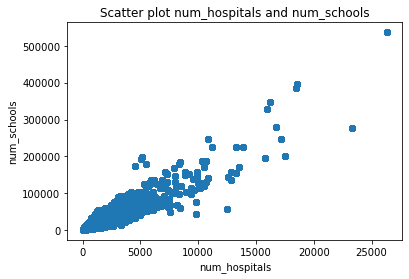

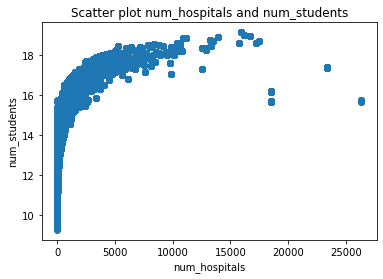

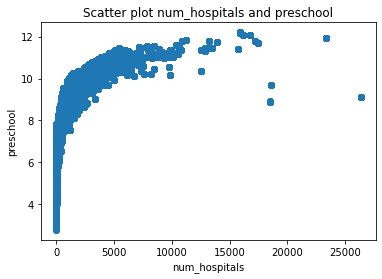

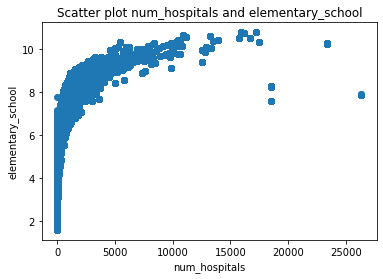

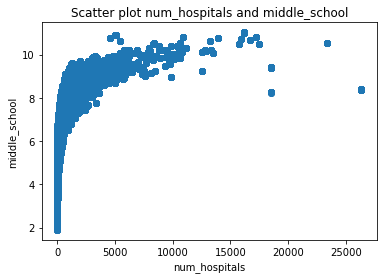

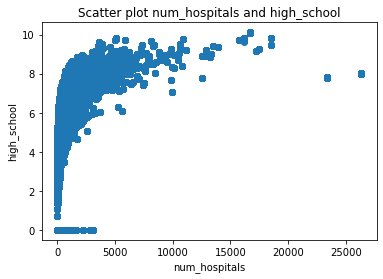

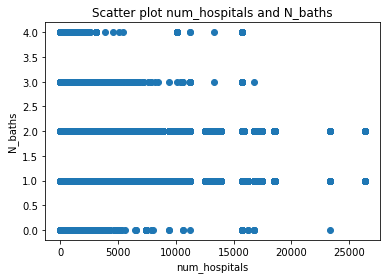

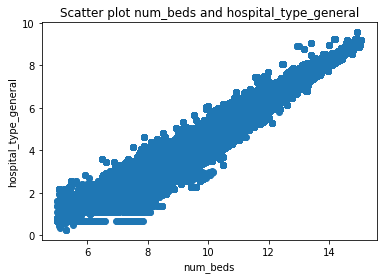

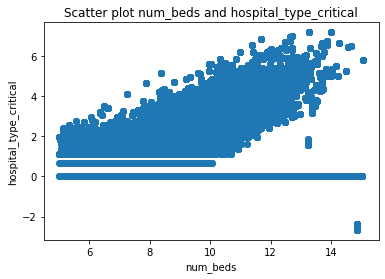

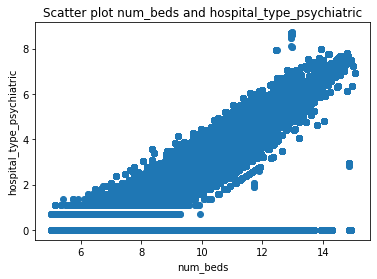

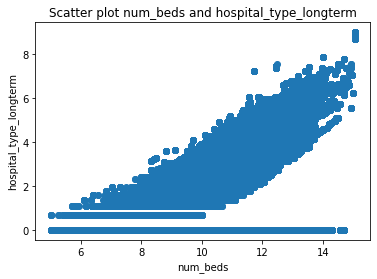

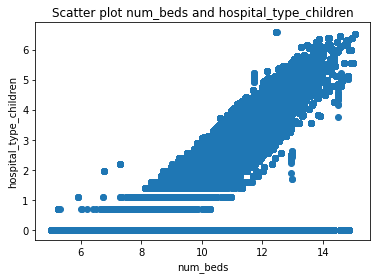

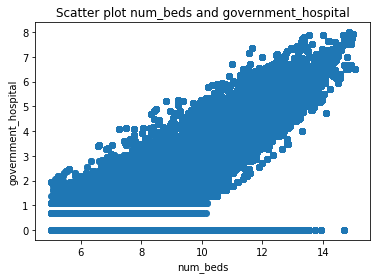

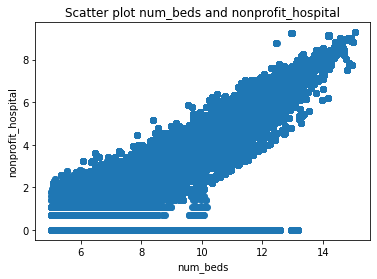

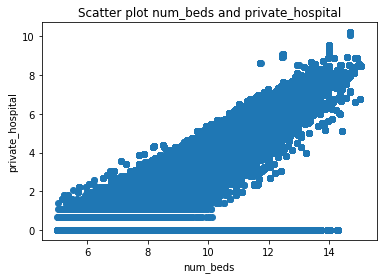

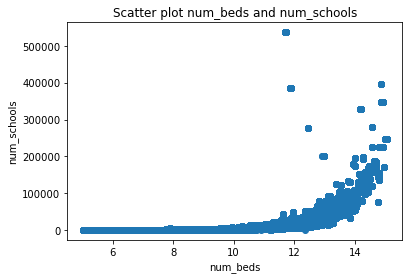

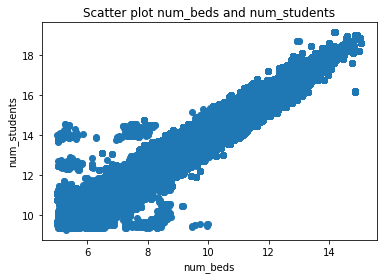

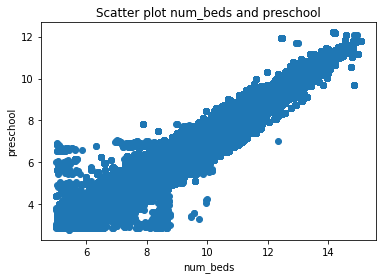

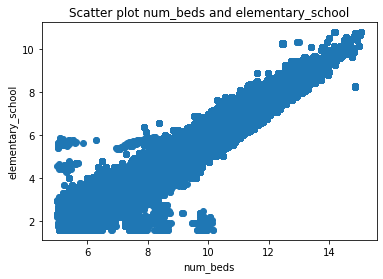

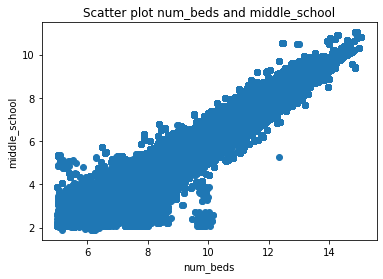

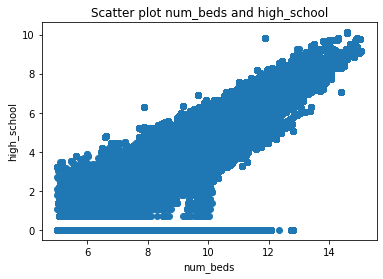

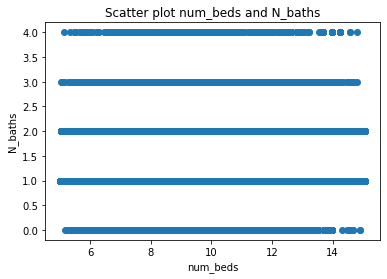

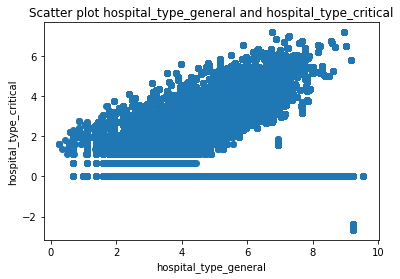

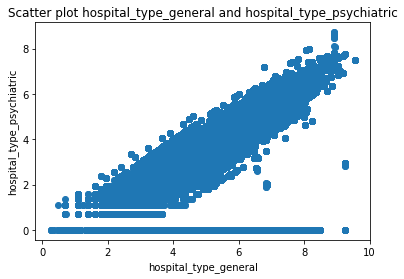

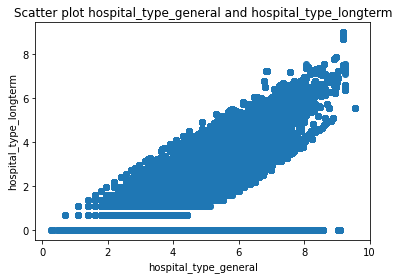

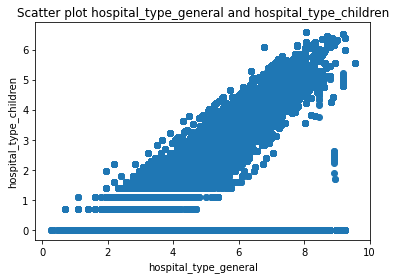

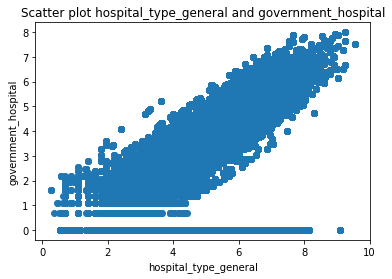

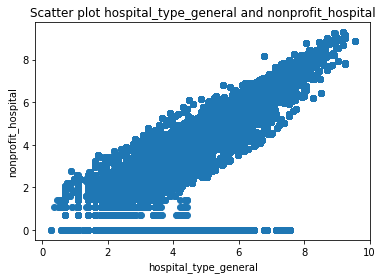

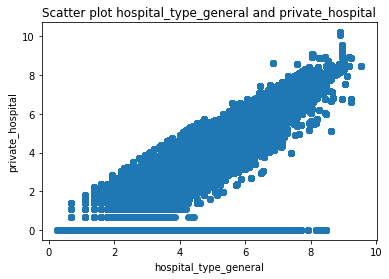

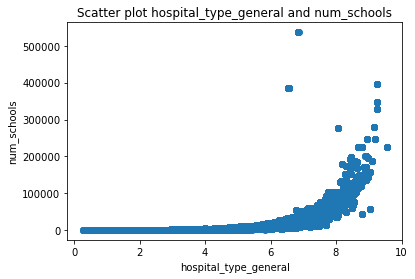

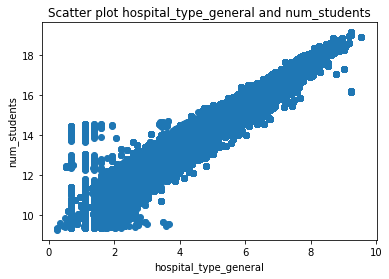

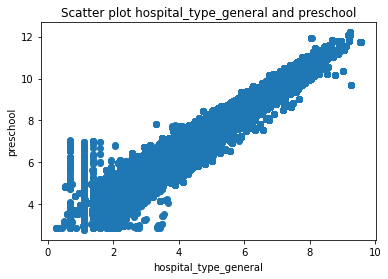

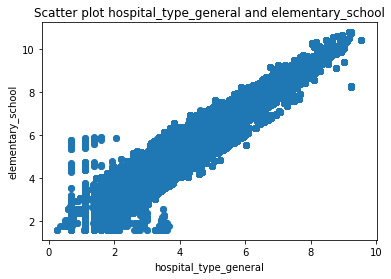

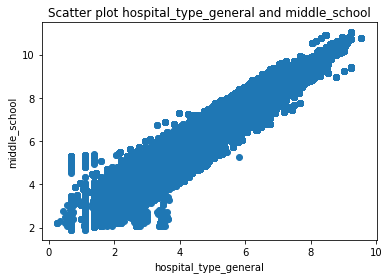

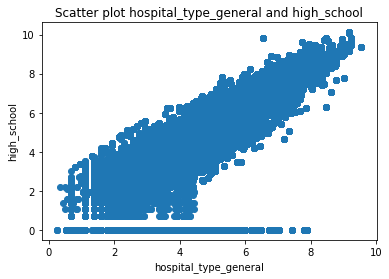

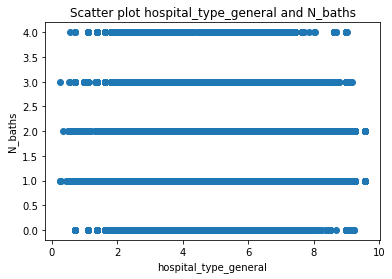

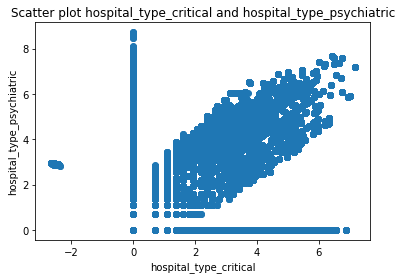

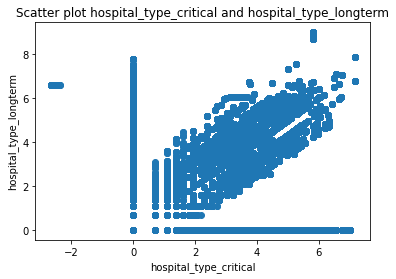

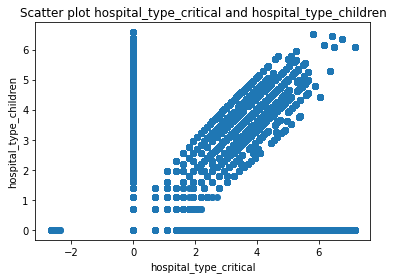

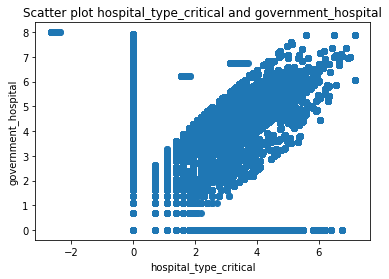

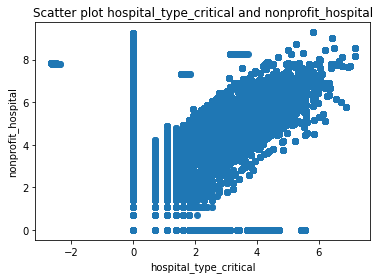

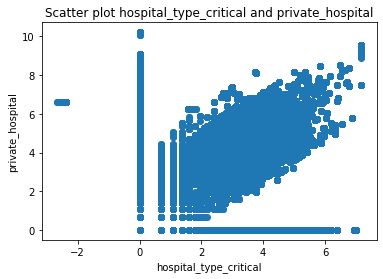

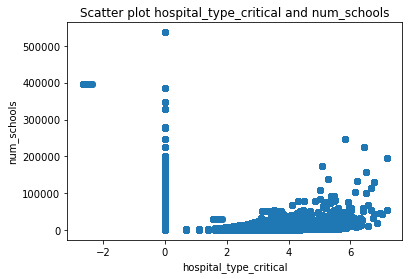

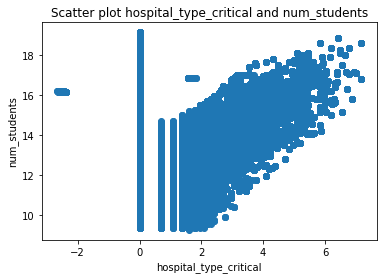

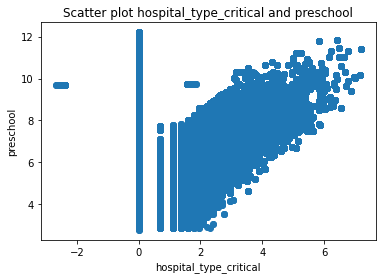

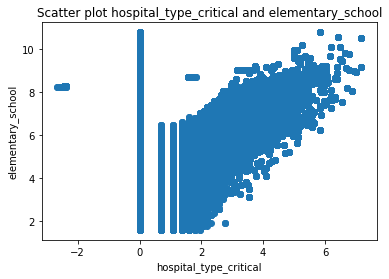

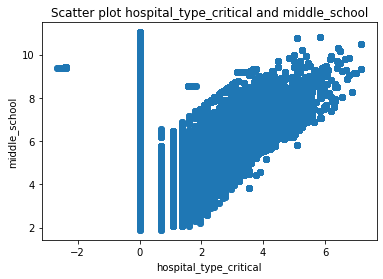

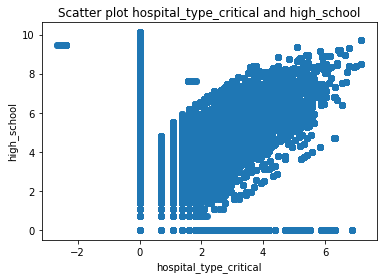

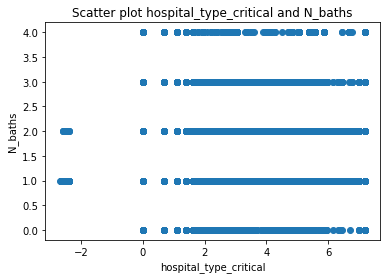

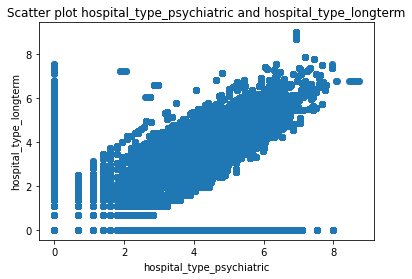

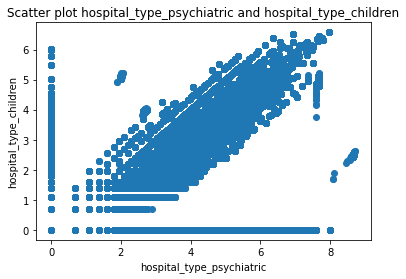

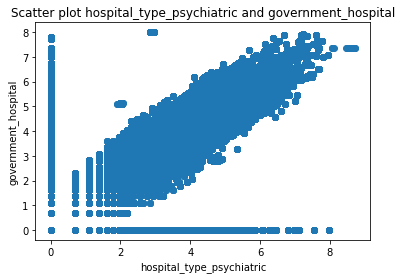

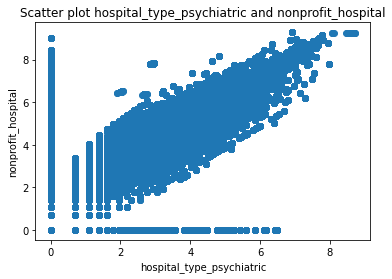

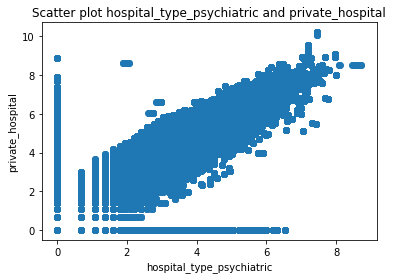

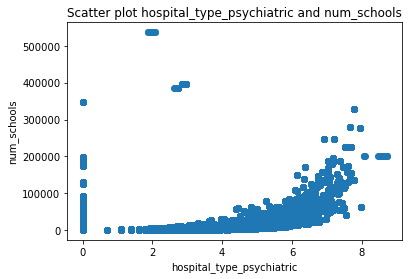

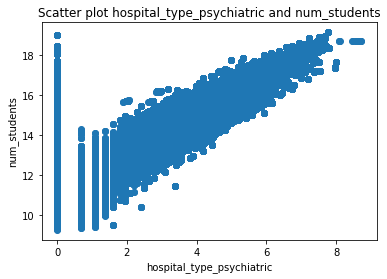

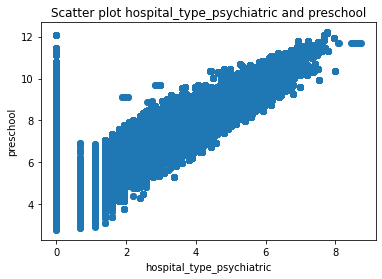

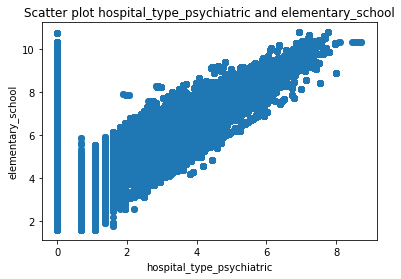

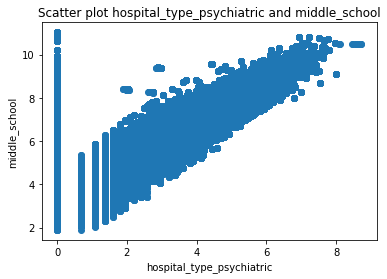

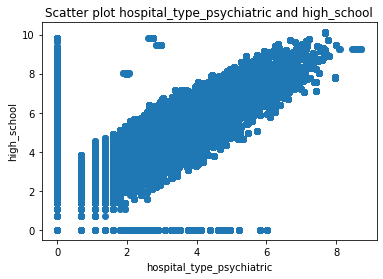

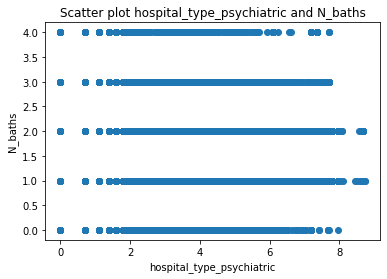

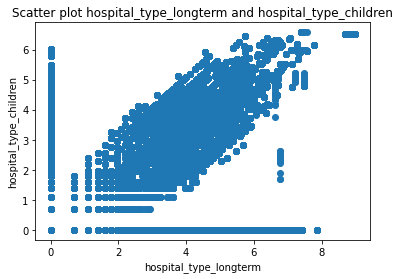

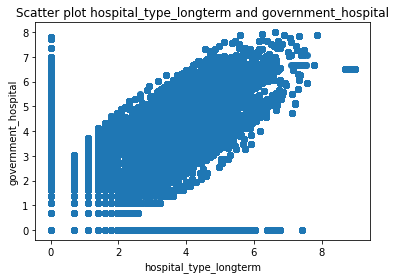

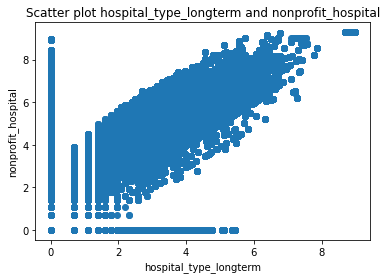

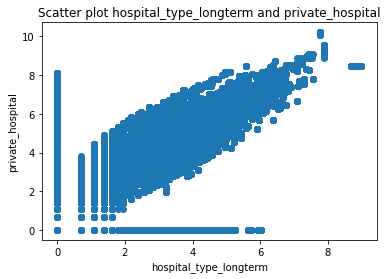

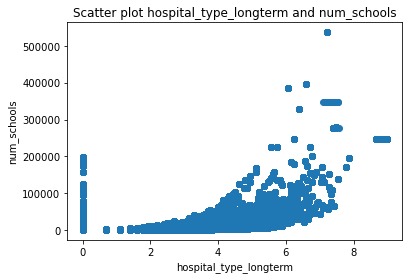

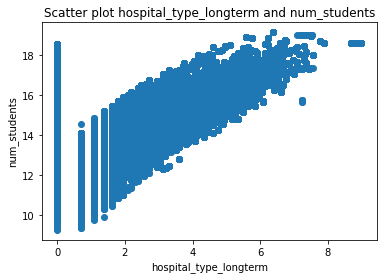

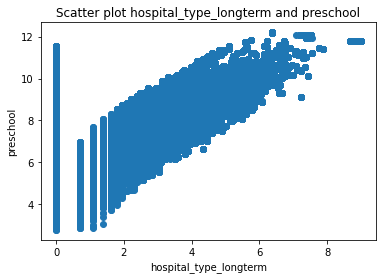

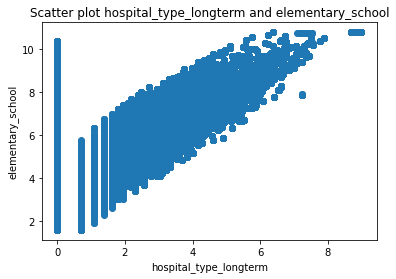

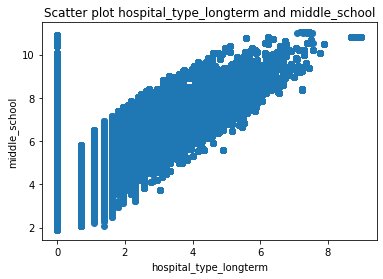

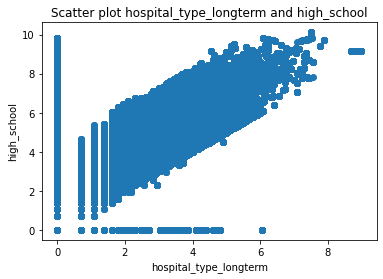

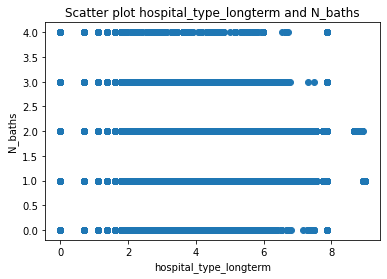

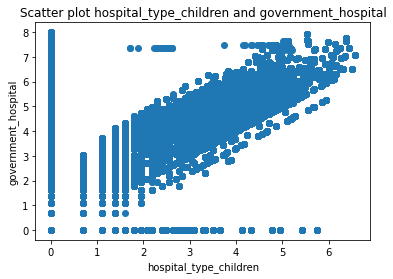

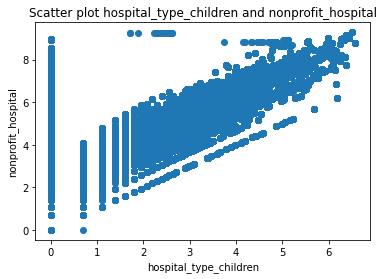

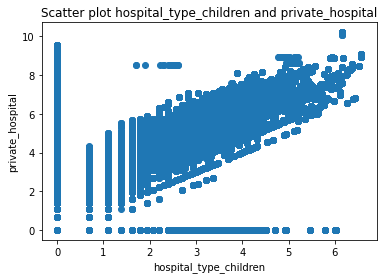

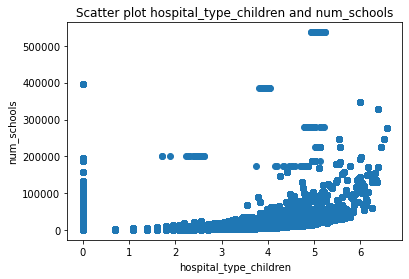

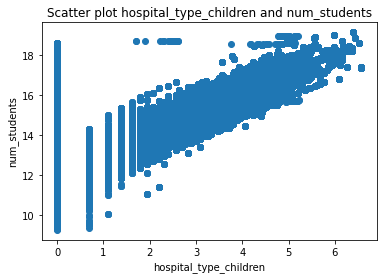

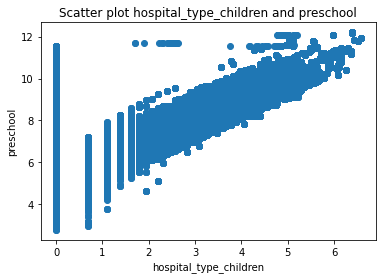

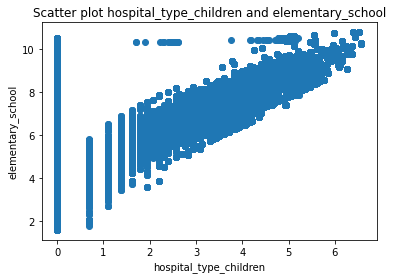

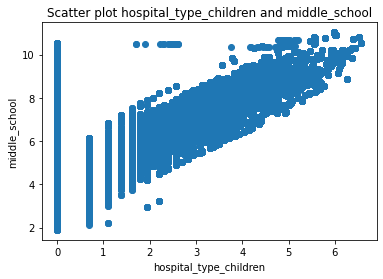

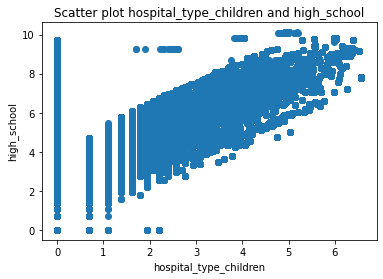

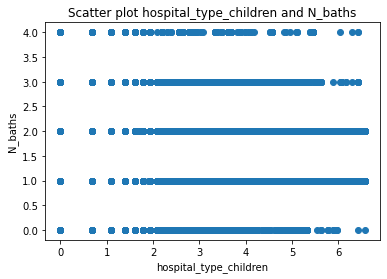

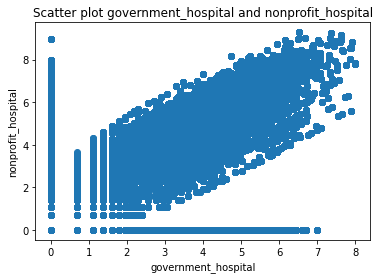

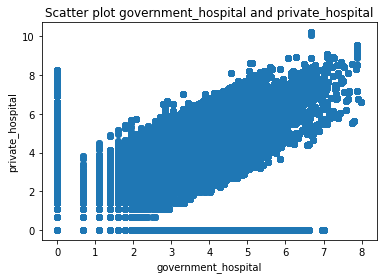

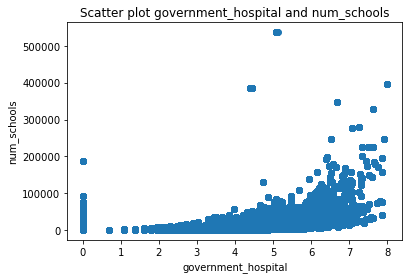

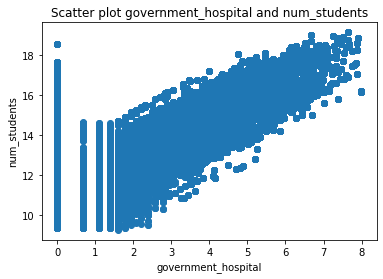

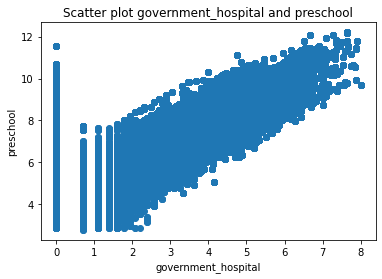

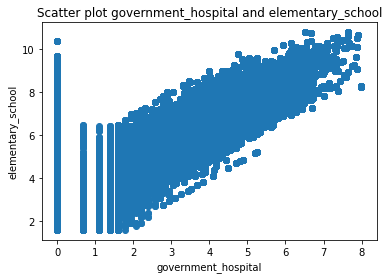

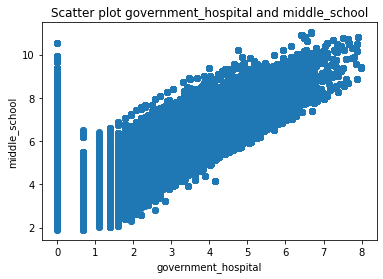

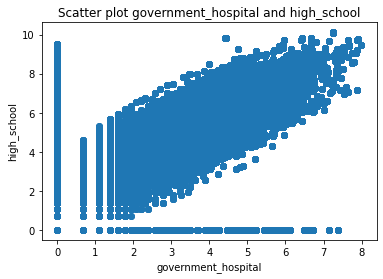

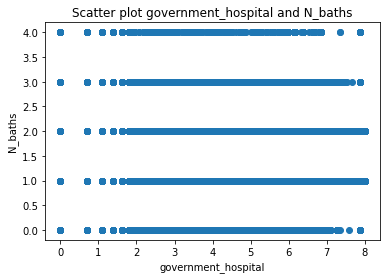

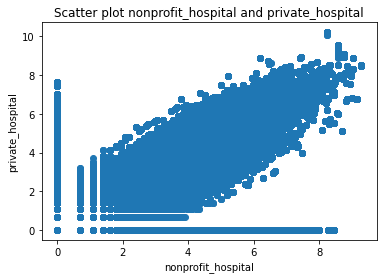

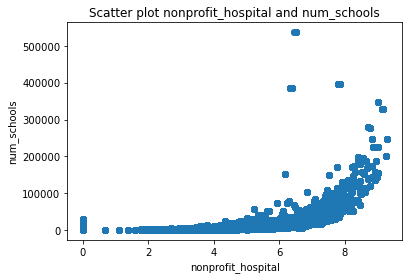

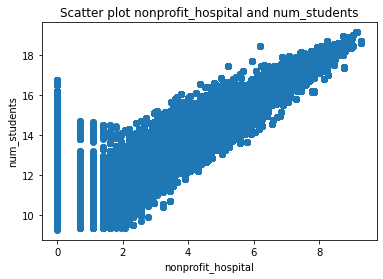

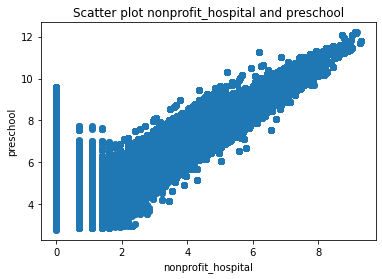

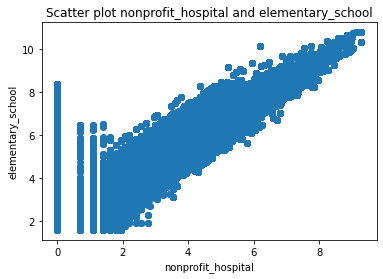

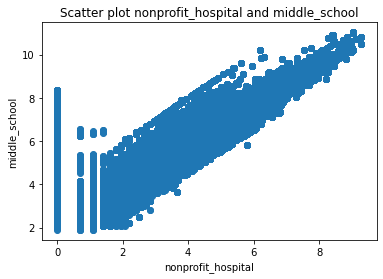

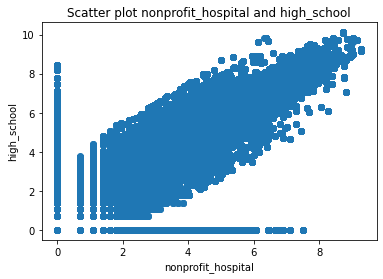

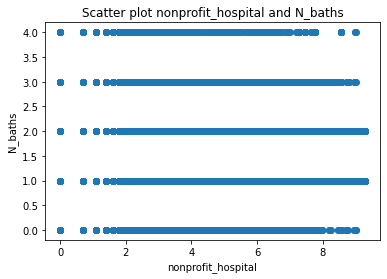

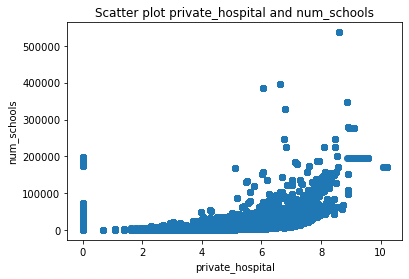

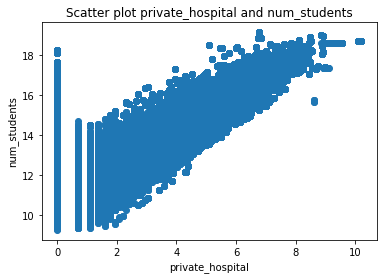

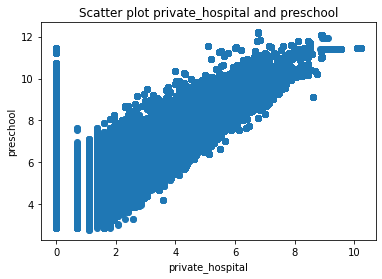

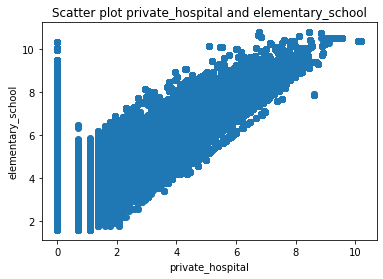

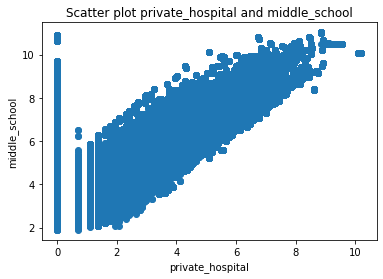

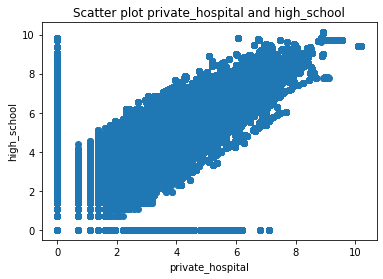

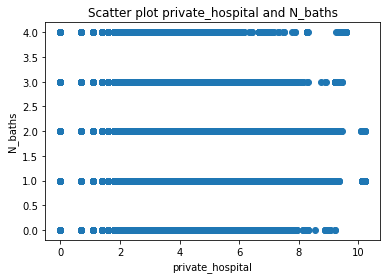

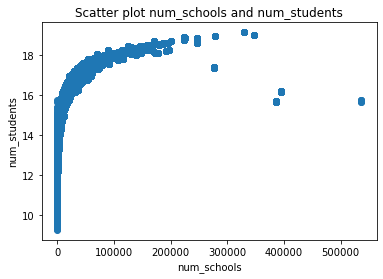

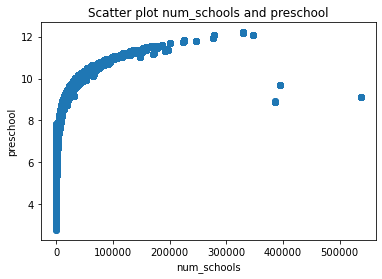

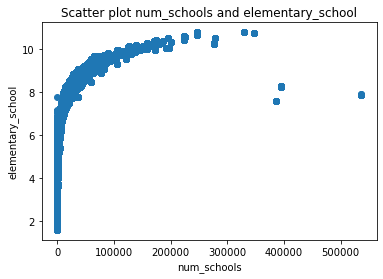

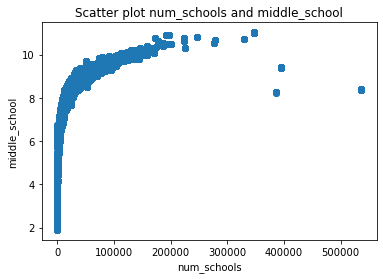

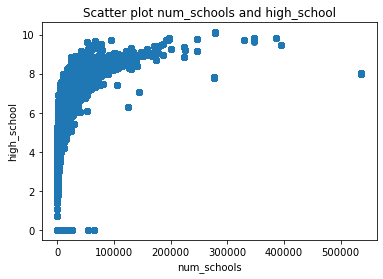

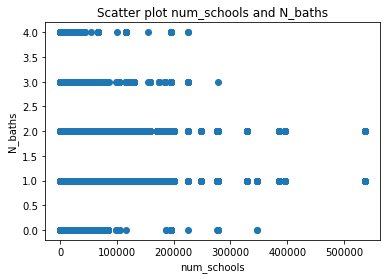

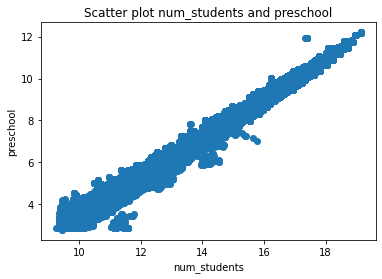

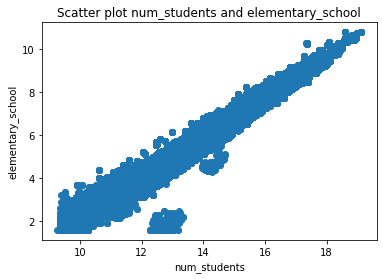

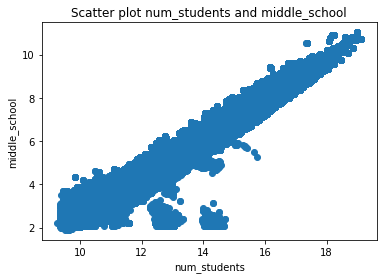

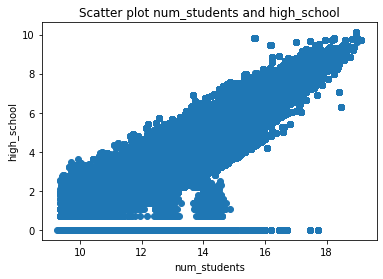

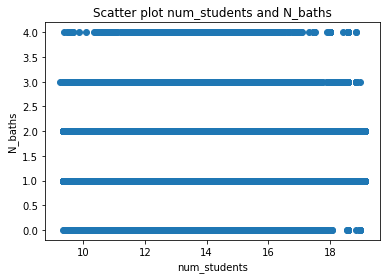

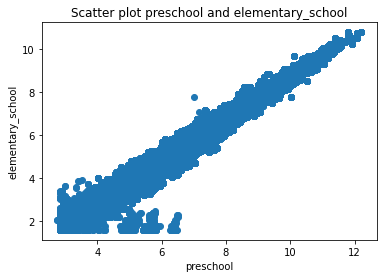

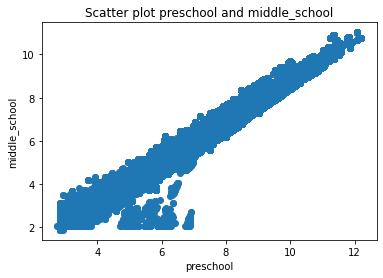

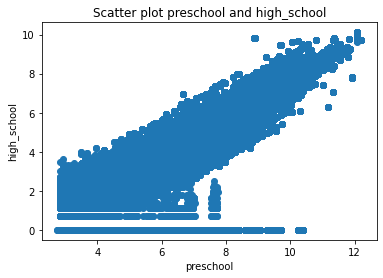

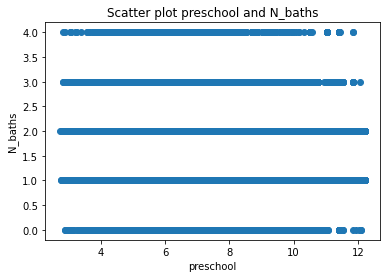

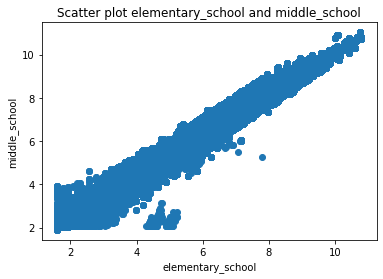

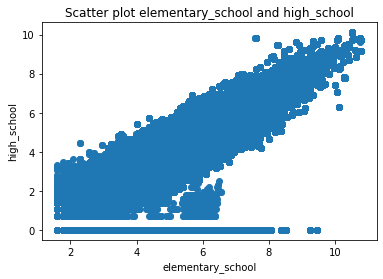

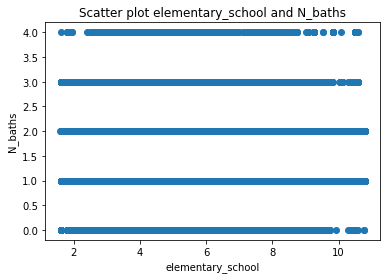

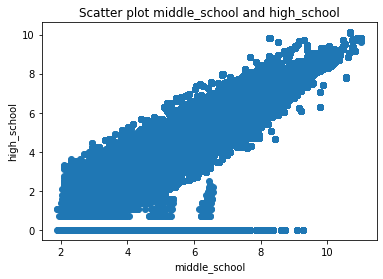

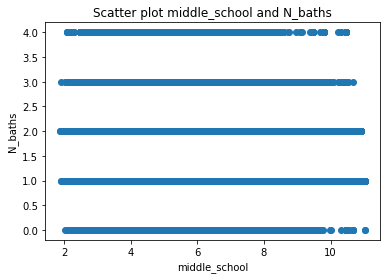

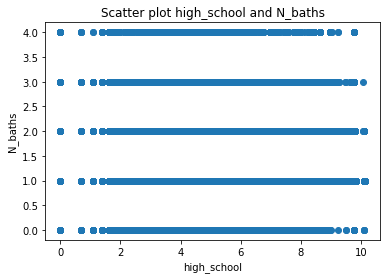

In [18]:
scatter(df)

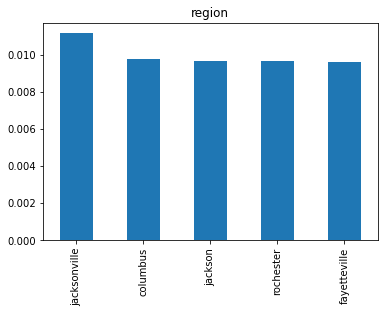

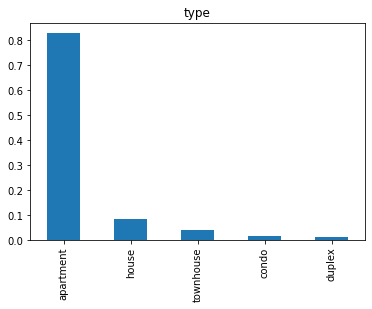

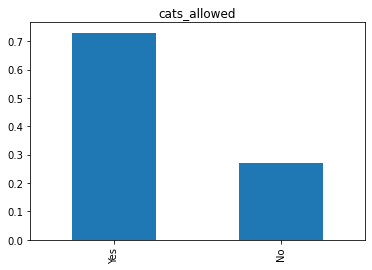

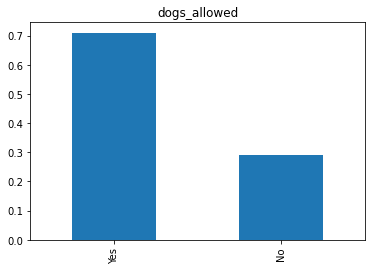

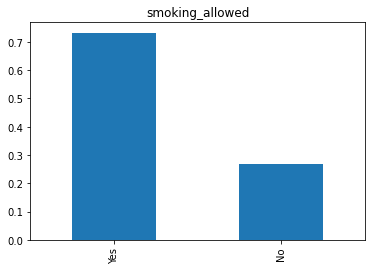

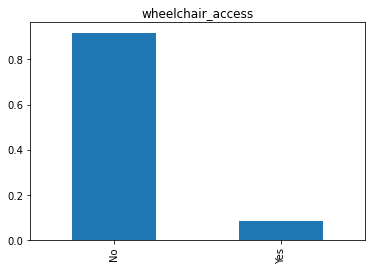

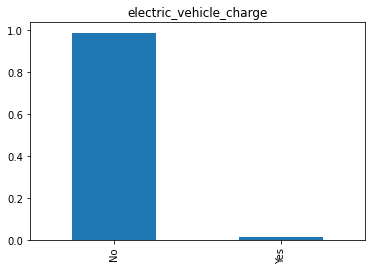

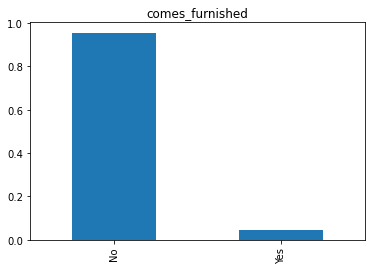

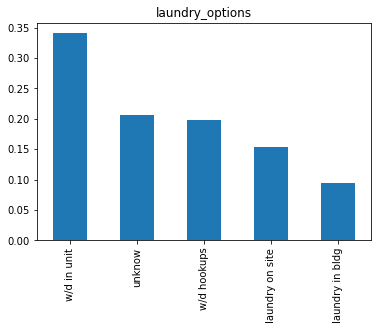

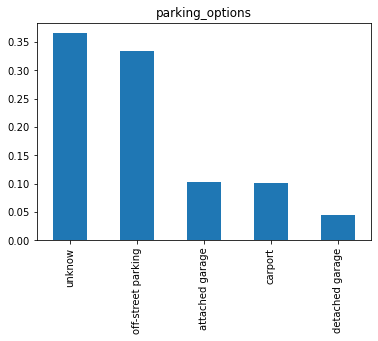

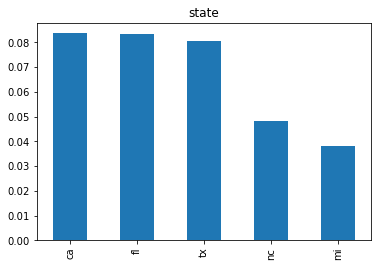

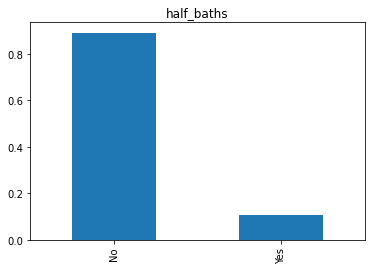

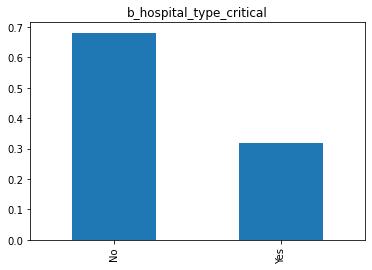

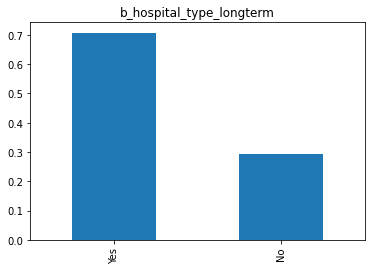

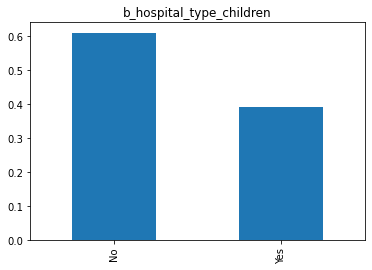

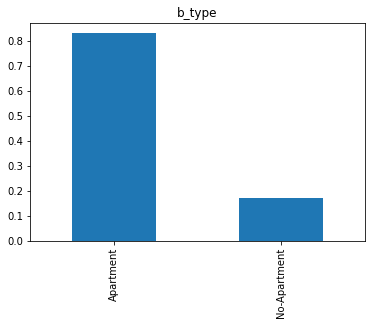

In [19]:
barplot(df,top=5,freq=True)